In [69]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


# Conectar ao banco de dados SQLite
conn = sqlite3.connect(r'C:\Users\Usuario\OneDrive\Documentos\final-project\final-project\seguros.db')

df_dict = pd.read_csv(r'C:\Users\Usuario\OneDrive\Documentos\final-project\final-project\data\P18_dicionario_dados.csv', encoding='utf-8', sep=',')
df_cancel = pd.read_csv(r'C:\Users\Usuario\OneDrive\Documentos\final-project\final-project\data\P18_cancelamentos.csv', encoding='utf-8', sep=',')
df_contratos = pd.read_csv(r'C:\Users\Usuario\OneDrive\Documentos\final-project\final-project\data\P18_contratos.csv', encoding='utf-8', sep=',')
df_clientes= pd.read_csv(r'C:\Users\Usuario\OneDrive\Documentos\final-project\final-project\data\P18_clientes.csv', encoding='utf-8', sep=',')
df_clientes.to_sql('clientes', conn, if_exists='replace', index=False)
df_contratos.to_sql('contratos', conn, if_exists='replace', index=False)
df_cancel.to_sql('cancelamentos', conn, if_exists='replace', index=False)

# Carregar as tabelas como DataFrames do pandas
df_clientes = pd.read_sql_query("SELECT * FROM clientes", conn)
df_contratos = pd.read_sql_query("SELECT * FROM contratos", conn)
df_cancel = pd.read_sql_query("SELECT * FROM cancelamentos", conn)




## 1.Perfil Demográfico do cliente

1.1 Como está divido nosso publico?



In [70]:
df_clientes['genero'].value_counts()

genero
Outro        1681
Feminino     1660
Masculino    1659
Name: count, dtype: int64

In [71]:
df_clientes['genero'].value_counts(normalize=True)*100


genero
Outro        33.62
Feminino     33.20
Masculino    33.18
Name: proportion, dtype: float64

1.2 Qual possui mais cancelamentos?

O gênero masculino possui mais cancelamentos, mas não é uma diferença significativa dos outros gêneros. Tendo em vista que estão bem divididos. 

      genero  total_cancelamentos
0  Masculino                  853
1      Outro                  841
2   Feminino                  826


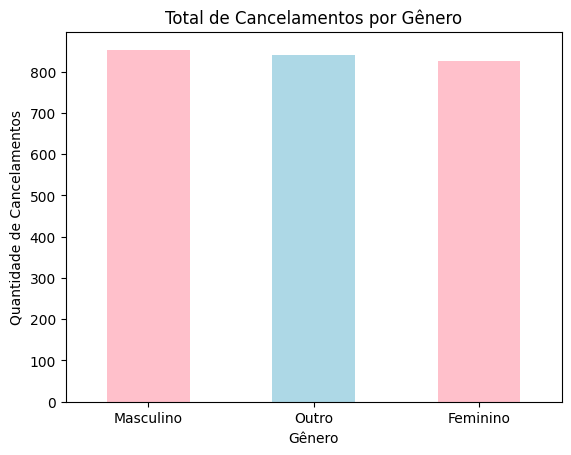

In [72]:
query = """
SELECT c.genero, COUNT(*) as total_cancelamentos
FROM cancelamentos ca
JOIN contratos co ON ca.id_contrato = co.id_contrato
JOIN clientes c ON co.id_cliente = c.id_cliente
GROUP BY c.genero
ORDER BY total_cancelamentos DESC
"""
df_cancel_por_genero = pd.read_sql_query(query, conn)
print(df_cancel_por_genero)


df_cancel_por_genero.plot(kind='bar', x='genero', y='total_cancelamentos', legend=False, color=['pink', 'lightblue'])
plt.title('Total de Cancelamentos por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Quantidade de Cancelamentos')
plt.xticks(rotation=0)
plt.show()

1.3 Como está divido as idades dos clientes?

In [73]:


query_idade = """
SELECT 
  CAST((julianday('now') - julianday(data_nascimento)) / 365.25 AS INT) AS idade, 
  COUNT(*) AS total
FROM clientes
GROUP BY idade
ORDER BY idade;
"""

df_idade_agrupada = pd.read_sql_query(query_idade, conn)
df_idade_agrupada


,idade,total
0,18,70
1,19,90
2,20,75
3,21,77
4,22,88
...,...,...
59,77,95
60,78,64
61,79,75
62,80,81


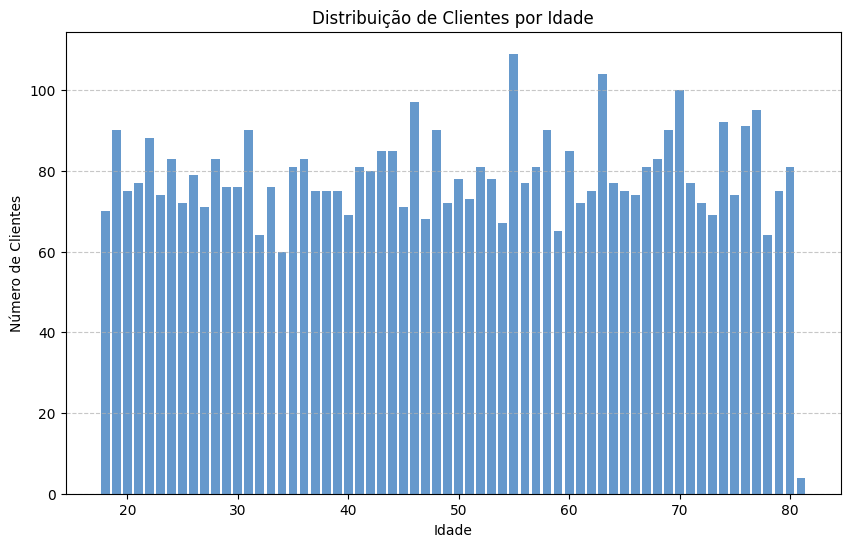

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(df_idade_agrupada['idade'], df_idade_agrupada['total'], color='#6699cc')
plt.xlabel('Idade')
plt.ylabel('Número de Clientes')
plt.title('Distribuição de Clientes por Idade')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Agrupando por faixa etária

In [75]:
query_faixa = """
SELECT 
  CASE 
    WHEN idade BETWEEN 18 AND 25 THEN '18-25'
    WHEN idade BETWEEN 26 AND 35 THEN '26-35'
    WHEN idade BETWEEN 36 AND 45 THEN '36-45'
    WHEN idade BETWEEN 46 AND 60 THEN '46-60'
    ELSE '60+' 
  END AS faixa_etaria,
  COUNT(*) AS total
FROM (
  SELECT CAST((julianday('now') - julianday(data_nascimento)) / 365.25 AS INT) AS idade
  FROM clientes
)
GROUP BY faixa_etaria
ORDER BY faixa_etaria;
"""

df_faixa_etaria = pd.read_sql_query(query_faixa, conn)
print(df_faixa_etaria)


  faixa_etaria  total
0        18-25    629
1        26-35    756
2        36-45    779
3        46-60   1211
4          60+   1625


In [76]:
query_faixa_genero = """
SELECT 
  CASE 
    WHEN idade BETWEEN 18 AND 25 THEN '18-25'
    WHEN idade BETWEEN 26 AND 35 THEN '26-35'
    WHEN idade BETWEEN 36 AND 45 THEN '36-45'
    WHEN idade BETWEEN 46 AND 60 THEN '46-60'
    ELSE '60+' 
  END AS faixa_etaria,
  genero,
  COUNT(*) AS total
FROM (
  SELECT 
    CAST((julianday('now') - julianday(data_nascimento)) / 365.25 AS INT) AS idade,
    genero
  FROM clientes
)
GROUP BY faixa_etaria, genero
ORDER BY faixa_etaria, genero;
"""

df_faixa_genero = pd.read_sql_query(query_faixa_genero, conn)
print(df_faixa_genero)


   faixa_etaria     genero  total
0         18-25   Feminino    215
1         18-25  Masculino    226
2         18-25      Outro    188
3         26-35   Feminino    213
4         26-35  Masculino    290
5         26-35      Outro    253
6         36-45   Feminino    261
7         36-45  Masculino    241
8         36-45      Outro    277
9         46-60   Feminino    418
10        46-60  Masculino    373
11        46-60      Outro    420
12          60+   Feminino    553
13          60+  Masculino    529
14          60+      Outro    543


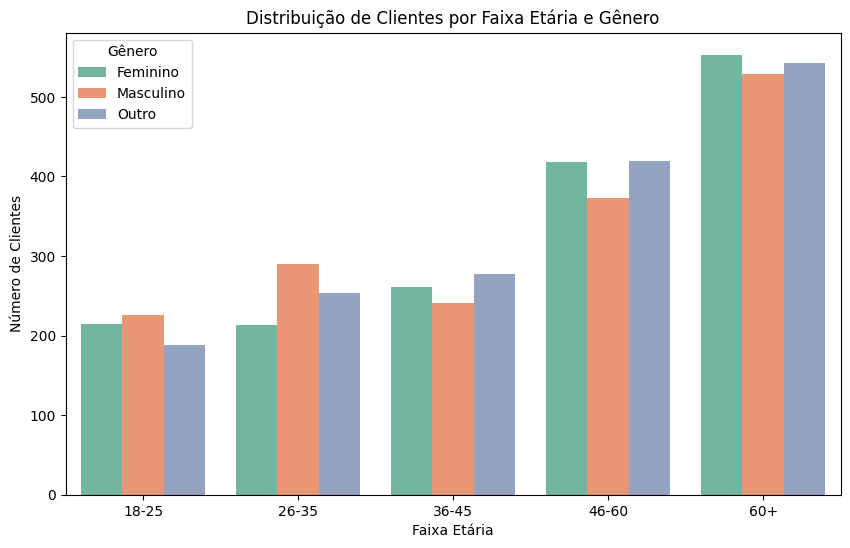

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(
    data=df_faixa_genero,  # substitua pelo nome do seu DataFrame com gênero
    x='faixa_etaria',
    y='total',
    hue='genero',
    palette='Set2'
)
plt.title('Distribuição de Clientes por Faixa Etária e Gênero')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Clientes')
plt.legend(title='Gênero')
plt.show()


1.4 Qual faixa etária possui mais cancelamentos?

In [78]:
query_faixa_cancel = """ 
SELECT 
  CASE 
    WHEN idade BETWEEN 18 AND 25 THEN '18-25'
    WHEN idade BETWEEN 26 AND 35 THEN '26-35'
    WHEN idade BETWEEN 36 AND 45 THEN '36-45'
    WHEN idade BETWEEN 46 AND 60 THEN '46-60'
    ELSE '60+'
  END AS faixa_etaria,
  COUNT(*) AS total_cancelamentos
FROM (
  SELECT 
    cl.data_nascimento,
    CAST((julianday('now') - julianday(cl.data_nascimento)) / 365.25 AS INT) AS idade
  FROM cancelamentos ca
  JOIN contratos co ON ca.id_contrato = co.id_contrato
  JOIN clientes cl ON co.id_cliente = cl.id_cliente
)
GROUP BY faixa_etaria
ORDER BY total_cancelamentos DESC;
"""
df_faixa_cancel = pd.read_sql_query(query_faixa_cancel, conn)

df_faixa_cancel

,faixa_etaria,total_cancelamentos
0,60+,806
1,46-60,618
2,36-45,417
3,26-35,380
4,18-25,299


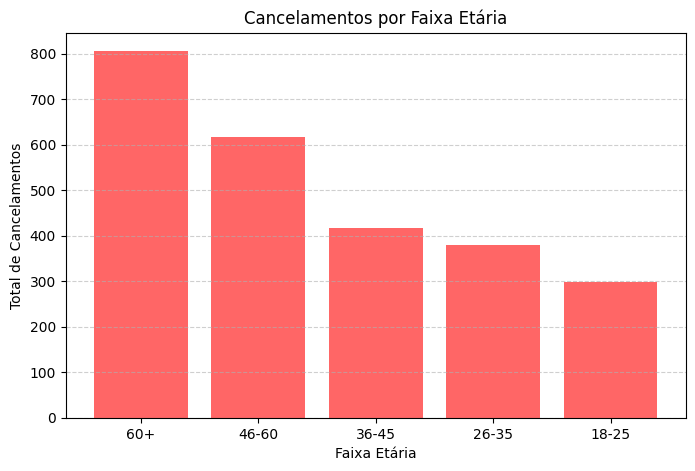

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(df_faixa_cancel['faixa_etaria'], df_faixa_cancel['total_cancelamentos'], color='#ff6666')
plt.xlabel('Faixa Etária')
plt.ylabel('Total de Cancelamentos')
plt.title('Cancelamentos por Faixa Etária')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


Qual tipo de seguro por faixa etária?

In [80]:
query_seguro_por_idade = """
SELECT 
  CASE 
    WHEN idade BETWEEN 18 AND 25 THEN '18-25'
    WHEN idade BETWEEN 26 AND 35 THEN '26-35'
    WHEN idade BETWEEN 36 AND 45 THEN '36-45'
    WHEN idade BETWEEN 46 AND 60 THEN '46-60'
    ELSE '60+'
  END AS faixa_etaria,
  co.tipo_seguro,
  COUNT(*) AS total
FROM (
  SELECT 
    cl.id_cliente,
    CAST((julianday('now') - julianday(cl.data_nascimento)) / 365.25 AS INT) AS idade
  FROM clientes cl
) AS sub
JOIN contratos co ON sub.id_cliente = co.id_cliente
GROUP BY faixa_etaria, co.tipo_seguro
ORDER BY faixa_etaria, total DESC;
"""
df_seguro_por_idade = pd.read_sql_query(query_seguro_por_idade, conn)
df_seguro_por_idade

,faixa_etaria,tipo_seguro,total
0,18-25,Empresarial,323
1,18-25,Saúde,318
2,18-25,Vida,303
3,18-25,Auto,297
4,18-25,Residencial,294
5,26-35,Empresarial,377
6,26-35,Auto,364
7,26-35,Saúde,361
8,26-35,Vida,347
9,26-35,Residencial,346


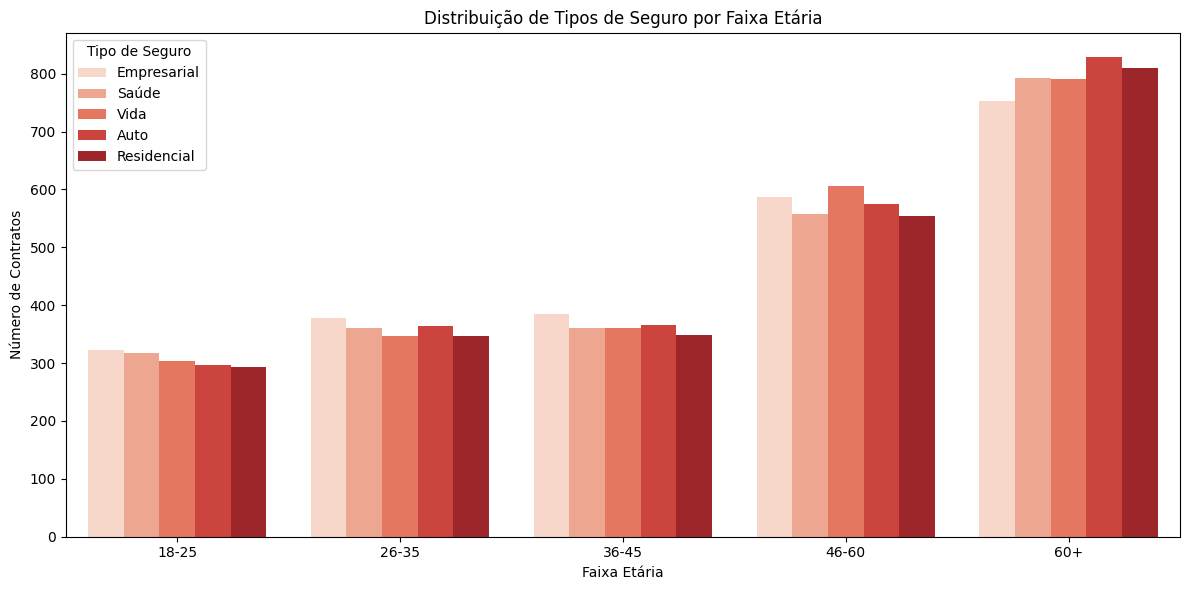

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(
    data=df_seguro_por_idade, 
    x='faixa_etaria', 
    y='total', 
    hue='tipo_seguro', 
    palette='Reds'
)
plt.title('Distribuição de Tipos de Seguro por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Contratos')
plt.legend(title='Tipo de Seguro')
plt.tight_layout()
plt.show()


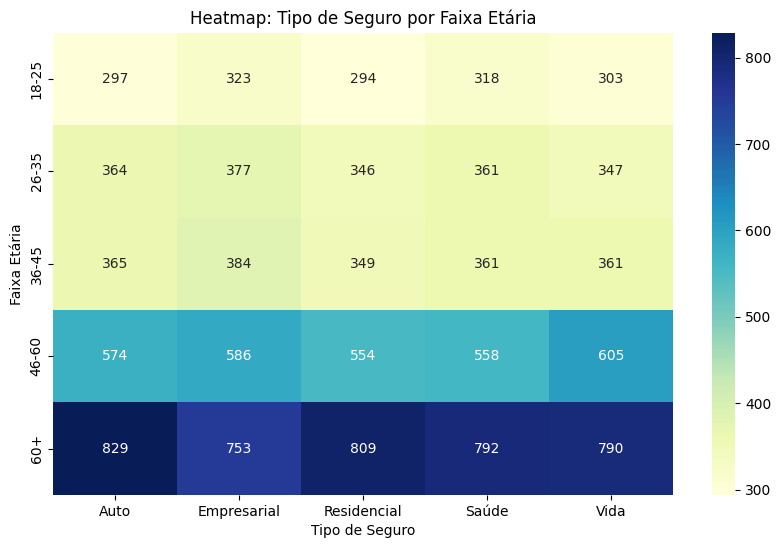

In [82]:
pivot = df_seguro_por_idade.pivot(index='faixa_etaria', columns='tipo_seguro', values='total').fillna(0)

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap: Tipo de Seguro por Faixa Etária')
plt.xlabel('Tipo de Seguro')
plt.ylabel('Faixa Etária')
plt.show()

Qual tipo de seguro mais cancelado por faixa etária?

In [83]:
query_seguro_cancelado_por_idade = """
SELECT 
  CASE 
    WHEN idade BETWEEN 18 AND 25 THEN '18-25'
    WHEN idade BETWEEN 26 AND 35 THEN '26-35'
    WHEN idade BETWEEN 36 AND 45 THEN '36-45'
    WHEN idade BETWEEN 46 AND 60 THEN '46-60'
    ELSE '60+'
  END AS faixa_etaria,
  co.tipo_seguro,
  COUNT(*) AS total_cancelamentos
FROM (
  SELECT 
    cl.id_cliente,
    CAST((julianday('now') - julianday(cl.data_nascimento)) / 365.25 AS INT) AS idade
  FROM clientes cl
) AS sub
JOIN contratos co ON sub.id_cliente = co.id_cliente
Join cancelamentos ca ON co.id_contrato = ca.id_contrato
GROUP BY faixa_etaria, co.tipo_seguro
ORDER BY faixa_etaria, total_cancelamentos DESC;
"""
df_seguro_cancelado_por_idade = pd.read_sql_query(query_seguro_cancelado_por_idade, conn)
df_seguro_cancelado_por_idade

,faixa_etaria,tipo_seguro,total_cancelamentos
0,18-25,Empresarial,73
1,18-25,Saúde,68
2,18-25,Vida,60
3,18-25,Residencial,49
4,18-25,Auto,49
5,26-35,Auto,88
6,26-35,Empresarial,87
7,26-35,Saúde,77
8,26-35,Vida,68
9,26-35,Residencial,60


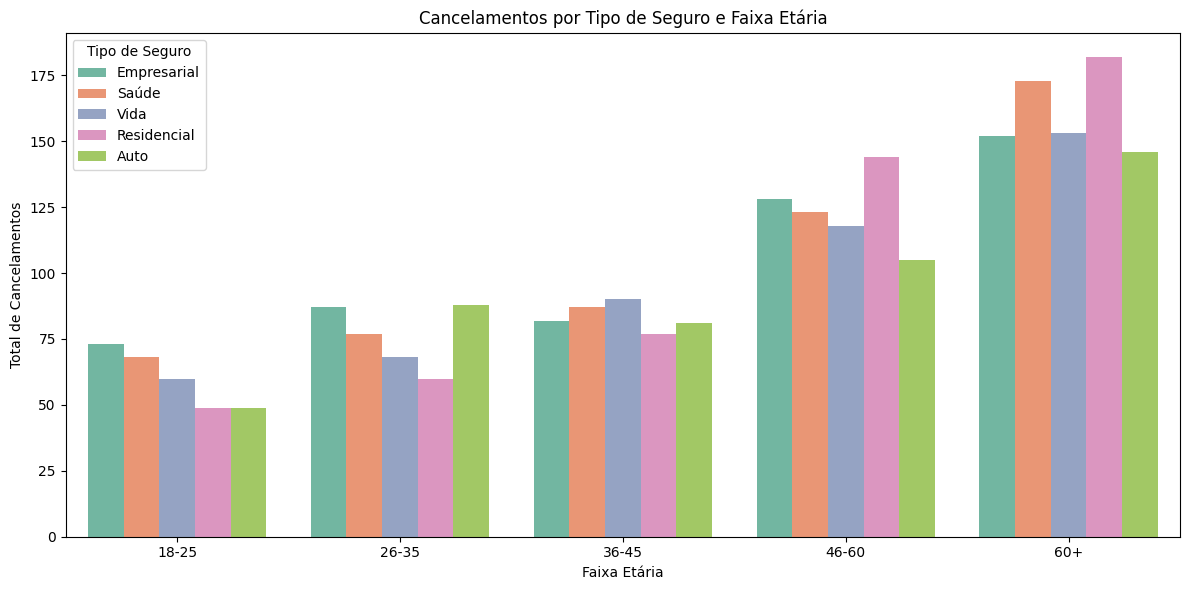

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(
    data=df_seguro_cancelado_por_idade,
    x='faixa_etaria',
    y='total_cancelamentos',
    hue='tipo_seguro',
    palette='Set2'
)
plt.title('Cancelamentos por Tipo de Seguro e Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Total de Cancelamentos')
plt.legend(title='Tipo de Seguro')
plt.tight_layout()
plt.show()


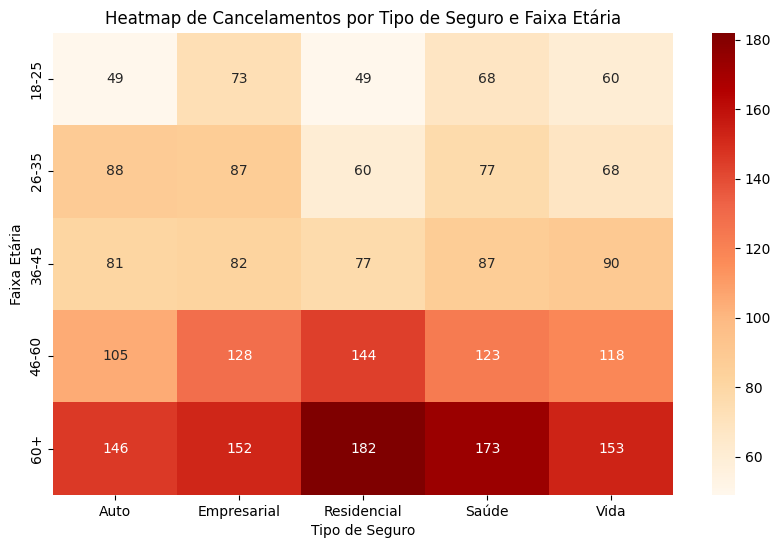

In [85]:
pivot = df_seguro_cancelado_por_idade.pivot(index='faixa_etaria', columns='tipo_seguro', values='total_cancelamentos').fillna(0)

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt='d', cmap='OrRd')
plt.title('Heatmap de Cancelamentos por Tipo de Seguro e Faixa Etária')
plt.xlabel('Tipo de Seguro')
plt.ylabel('Faixa Etária')
plt.show()


1.5 Como está a distribuição de clientes com dependentes?

In [86]:
query_dependentes = """
SELECT 
  CASE 
    WHEN idade BETWEEN 18 AND 25 THEN '18-25'
    WHEN idade BETWEEN 26 AND 35 THEN '26-35'
    WHEN idade BETWEEN 36 AND 45 THEN '36-45'
    WHEN idade BETWEEN 46 AND 60 THEN '46-60'
    ELSE '60+'
  END AS faixa_etaria,
  cl.qtd_dependentes,
  COUNT(*) AS total
FROM (
  SELECT 
    id_cliente,
    qtd_dependentes,
    CAST((julianday('now') - julianday(data_nascimento)) / 365.25 AS INT) AS idade
  FROM clientes
) AS cl
GROUP BY faixa_etaria, cl.qtd_dependentes
ORDER BY faixa_etaria, cl.qtd_dependentes;
"""
df_dependentes_por_faixa_etaria = pd.read_sql_query(query_dependentes, conn)
df_dependentes_por_faixa_etaria

,faixa_etaria,qtd_dependentes,total
0,18-25,0,159
1,18-25,1,192
2,18-25,2,166
3,18-25,3,71
4,18-25,4,34
5,18-25,5,7
6,26-35,0,169
7,26-35,1,252
8,26-35,2,219
9,26-35,3,78


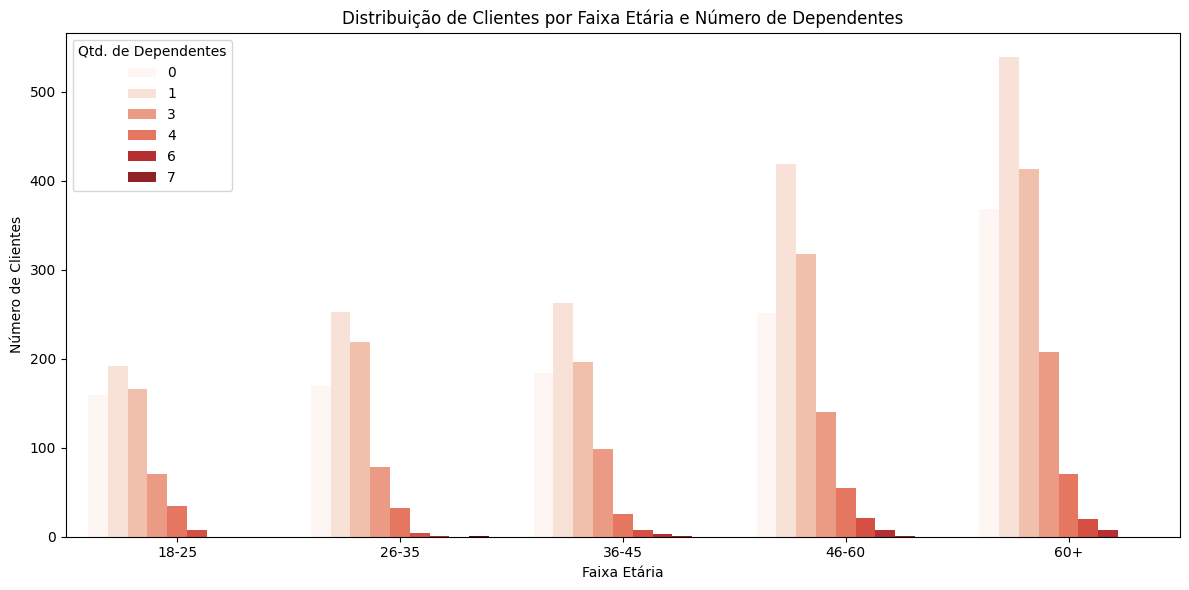

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(
    data=df_dependentes_por_faixa_etaria,
    x='faixa_etaria',
    y='total',
    hue='qtd_dependentes',
    palette='Reds'
)
plt.title('Distribuição de Clientes por Faixa Etária e Número de Dependentes')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Clientes')
plt.legend(title='Qtd. de Dependentes')
plt.tight_layout()
plt.show()


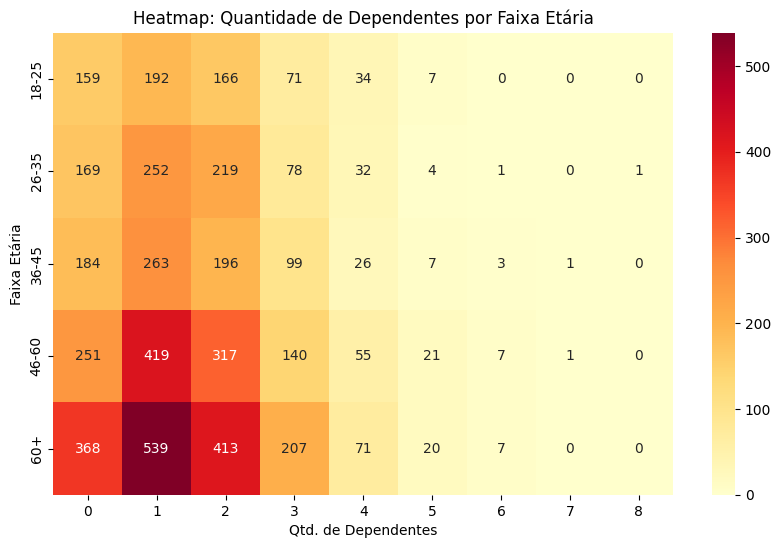

In [88]:
pivot = df_dependentes_por_faixa_etaria.pivot(
    index='faixa_etaria',
    columns='qtd_dependentes',
    values='total'
).fillna(0)

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('Heatmap: Quantidade de Dependentes por Faixa Etária')
plt.xlabel('Qtd. de Dependentes')
plt.ylabel('Faixa Etária')
plt.show()


Sem agrupar por faixa etária

In [89]:
query_dependentes_sem_idade = """
SELECT
  cl.qtd_dependentes,
  COUNT(*) AS total
FROM clientes cl
GROUP BY cl.qtd_dependentes
ORDER BY cl.qtd_dependentes;
"""
df_dependentes_sem_idade = pd.read_sql_query(query_dependentes_sem_idade, conn)
df_dependentes_sem_idade

,qtd_dependentes,total
0,0,1131
1,1,1665
2,2,1311
3,3,595
4,4,218
5,5,59
6,6,18
7,7,2
8,8,1


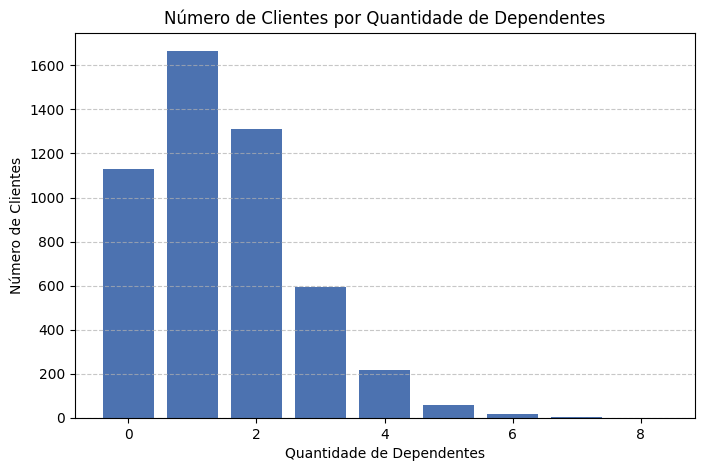

In [90]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(
    df_dependentes_sem_idade['qtd_dependentes'], 
    df_dependentes_sem_idade['total'], 
    color='#4c72b0'
)
plt.title('Número de Clientes por Quantidade de Dependentes')
plt.xlabel('Quantidade de Dependentes')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


1.6 Clientes com dependentes (filhos, cônjuges) cancelam mais ou menos? 

In [91]:
query_dependentes_rel_cancel = """
SELECT 
  cl.qtd_dependentes,
  COUNT(*) AS total_cancelamentos
FROM cancelamentos ca
JOIN contratos co ON ca.id_contrato = co.id_contrato
JOIN clientes cl ON co.id_cliente = cl.id_cliente
GROUP BY cl.qtd_dependentes
ORDER BY cl.qtd_dependentes;
"""

df_dependentes_rel_cancel = pd.read_sql_query(query_dependentes_rel_cancel, conn)
df_dependentes_rel_cancel

,qtd_dependentes,total_cancelamentos
0,0,576
1,1,831
2,2,661
3,3,300
4,4,109
5,5,30
6,6,11
7,7,1
8,8,1


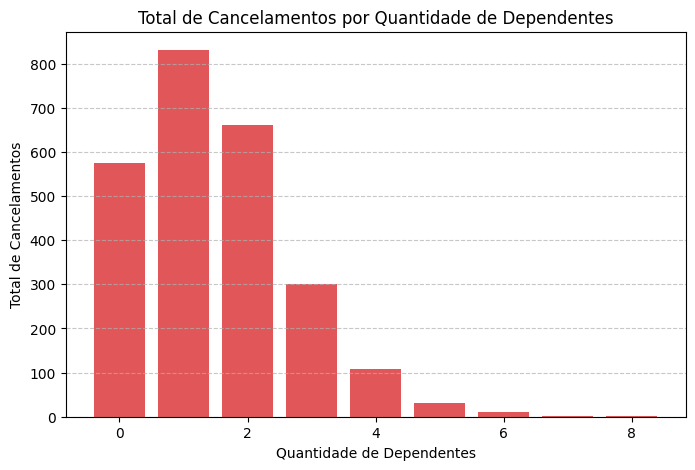

In [92]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(
    df_dependentes_rel_cancel['qtd_dependentes'],
    df_dependentes_rel_cancel['total_cancelamentos'],
    color='#e15759'
)
plt.title('Total de Cancelamentos por Quantidade de Dependentes')
plt.xlabel('Quantidade de Dependentes')
plt.ylabel('Total de Cancelamentos')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


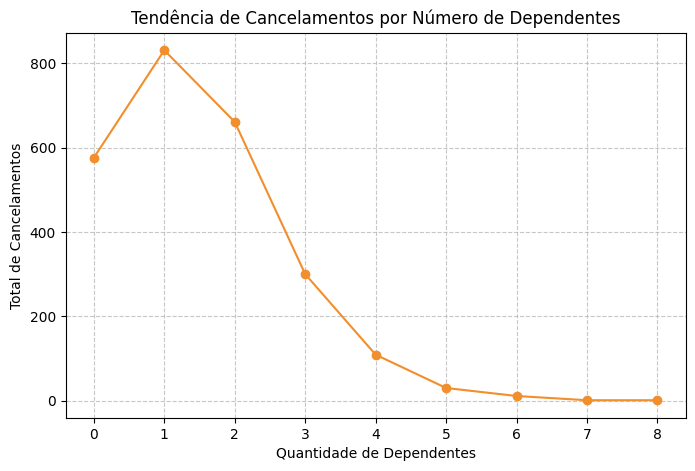

In [93]:
plt.figure(figsize=(8,5))
plt.plot(
    df_dependentes_rel_cancel['qtd_dependentes'],
    df_dependentes_rel_cancel['total_cancelamentos'],
    marker='o',
    linestyle='-',
    color='#f28e2b'
)
plt.title('Tendência de Cancelamentos por Número de Dependentes')
plt.xlabel('Quantidade de Dependentes')
plt.ylabel('Total de Cancelamentos')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [94]:
query_dependentes_rel_cancel_seguro = """
SELECT 
  cl.qtd_dependentes,
  co.tipo_seguro,
  COUNT(*) AS total_cancelamentos
FROM cancelamentos ca
JOIN contratos co ON ca.id_contrato = co.id_contrato
JOIN clientes cl ON co.id_cliente = cl.id_cliente
GROUP BY cl.qtd_dependentes, co.tipo_seguro
ORDER BY cl.qtd_dependentes, co.tipo_seguro;
"""

df_dependentes_rel_cancel_seguro = pd.read_sql_query(query_dependentes_rel_cancel_seguro, conn)
df_dependentes_rel_cancel_seguro


,qtd_dependentes,tipo_seguro,total_cancelamentos
0,0,Auto,93
1,0,Empresarial,136
2,0,Residencial,103
3,0,Saúde,122
4,0,Vida,122
5,1,Auto,158
6,1,Empresarial,145
7,1,Residencial,192
8,1,Saúde,178
9,1,Vida,158


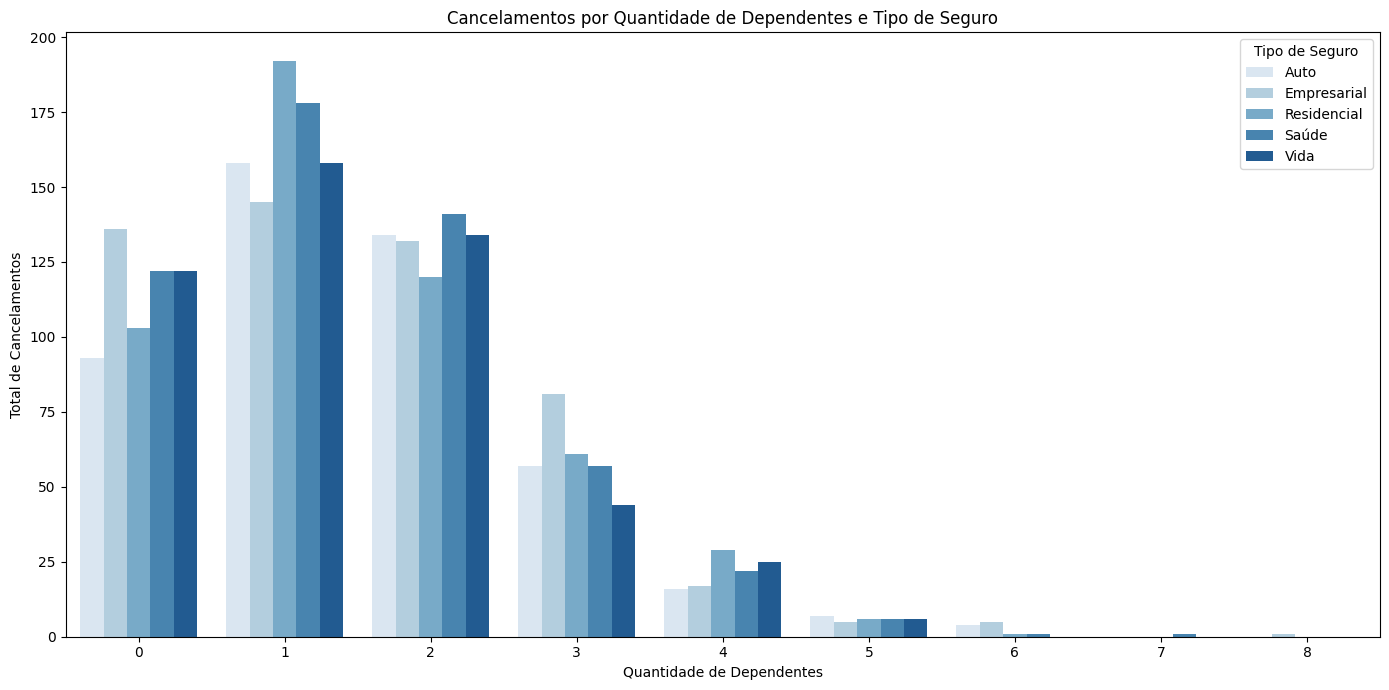

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,7))
sns.barplot(
    data=df_dependentes_rel_cancel_seguro,
    x='qtd_dependentes',
    y='total_cancelamentos',
    hue='tipo_seguro',
    palette='Blues'
)
plt.title('Cancelamentos por Quantidade de Dependentes e Tipo de Seguro')
plt.xlabel('Quantidade de Dependentes')
plt.ylabel('Total de Cancelamentos')
plt.legend(title='Tipo de Seguro')
plt.tight_layout()
plt.show()


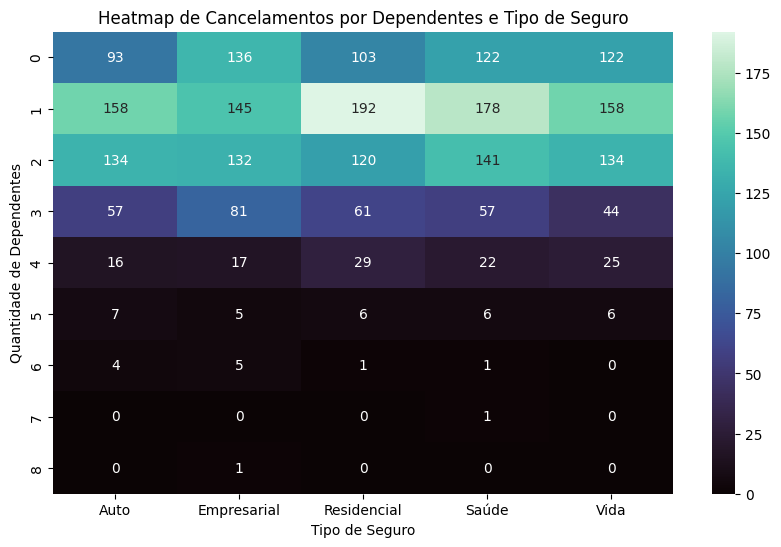

In [96]:
pivot = df_dependentes_rel_cancel_seguro.pivot(
    index='qtd_dependentes',
    columns='tipo_seguro',
    values='total_cancelamentos'
).fillna(0)

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='mako')
plt.title('Heatmap de Cancelamentos por Dependentes e Tipo de Seguro')
plt.xlabel('Tipo de Seguro')
plt.ylabel('Quantidade de Dependentes')
plt.show()


1.7 Quantos tipos de profissões temos?

In [97]:
query_profissoes_tipos = """ 
SELECT cl.profissao, 
    count(*) AS total
FROM clientes cl 
GROUP BY cl.profissao
ORDER BY total;
"""

df_profissoes_agroup = pd.read_sql_query(query_profissoes_tipos, conn)
df_profissoes_agroup

,profissao,total
0,Despachante,1
1,Engenheiro têxtil,1
2,Estivador,1
3,Estoquista,1
4,Tecnólogo em automação industrial,1
...,...,...
743,Tecnólogo em produção de bebidas,14
744,Tintureiro,14
745,Recreador,15
746,Sociólogo,15


1.8 Existe alguma profissão mais comum?

In [98]:

df_profissoes_agroup.loc[df_profissoes_agroup['total'].idxmax()]


profissao    Ginecologista
total                   16
Name: 747, dtype: object

1.9 Clientes com profissões específicas tendem a cancelar mais?

In [99]:
query_profissoes_cancel = """
SELECT 
  cl.profissao,
  COUNT(DISTINCT cl.id_cliente) AS total_profissoes,
  COUNT(ca.id_contrato) AS total_cancelamentos
FROM clientes cl
LEFT JOIN contratos co ON cl.id_cliente = co.id_cliente
LEFT JOIN cancelamentos ca ON co.id_contrato = ca.id_contrato
GROUP BY cl.profissao
ORDER BY total_cancelamentos DESC;
"""
df_profissoes_agroup_cancel = pd.read_sql_query(query_profissoes_cancel, conn)
df_profissoes_agroup_cancel

,profissao,total_profissoes,total_cancelamentos
0,Patinador,14,14
1,Mãe social,13,13
2,Esgrimista,14,12
3,Teólogo,13,11
4,Tecnólogo em produção de bebidas,14,11
...,...,...,...
743,Apresentador,5,0
744,Analista de sistemas,3,0
745,Ambulante,6,0
746,Aeronauta,5,0


1.10 Qual é o nível educacional dos nossos clientes?

In [100]:
query_nivel_educacional_agroup = """ 
SELECT cl.nivel_educacional, 
    count(*) AS total
FROM clientes cl 
GROUP BY cl.nivel_educacional
ORDER BY total
"""

df_nivel_educacional_agroup = pd.read_sql_query(query_nivel_educacional_agroup, conn)
df_nivel_educacional_agroup


,nivel_educacional,total
0,Pós,979
1,Superior,986
2,Técnico,994
3,Fundamental,1007
4,Médio,1034


1.11 Qual a relação entre cancelamento e nível educacional?

In [101]:
query_nivel_educacional_agroup_cancel = """
SELECT 
  cl.nivel_educacional,
  COUNT(DISTINCT cl.id_cliente) AS total_clientes,
  COUNT(ca.id_contrato) AS total_cancelamentos
FROM clientes cl
LEFT JOIN contratos co ON cl.id_cliente = co.id_cliente
LEFT JOIN cancelamentos ca ON co.id_contrato = ca.id_contrato
GROUP BY cl.nivel_educacional
ORDER BY total_cancelamentos DESC;
"""
df_nivel_educacional_agroup_cancel = pd.read_sql_query(query_nivel_educacional_agroup_cancel, conn)
df_nivel_educacional_agroup_cancel

,nivel_educacional,total_clientes,total_cancelamentos
0,Fundamental,1007,531
1,Superior,986,510
2,Médio,1034,510
3,Pós,979,487
4,Técnico,994,482


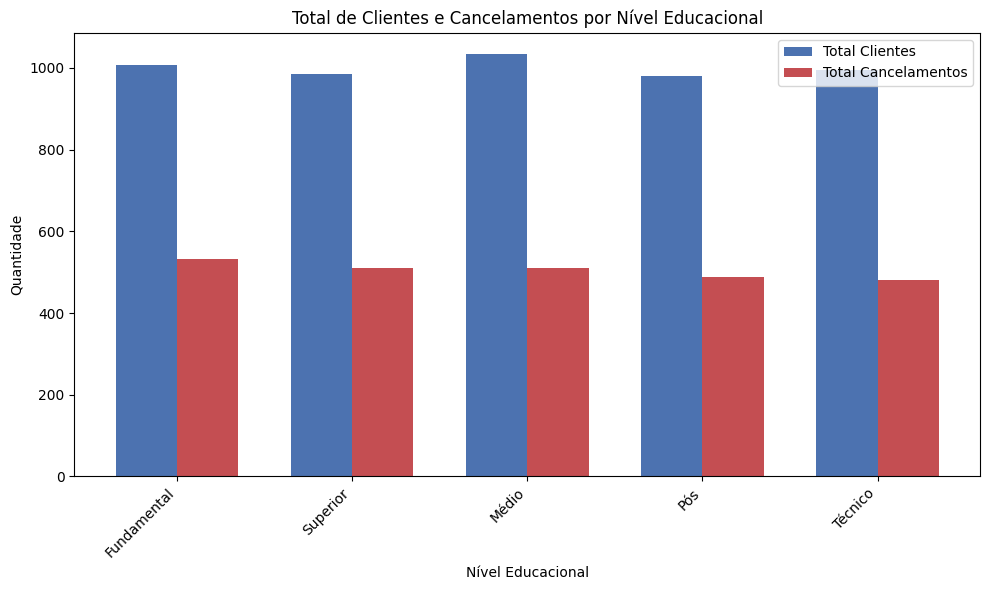

In [102]:
import matplotlib.pyplot as plt
import numpy as np

labels = df_nivel_educacional_agroup_cancel['nivel_educacional']
clientes = df_nivel_educacional_agroup_cancel['total_clientes']
cancelamentos = df_nivel_educacional_agroup_cancel['total_cancelamentos']

x = np.arange(len(labels))
largura = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - largura/2, clientes, largura, label='Total Clientes', color='#4c72b0')
plt.bar(x + largura/2, cancelamentos, largura, label='Total Cancelamentos', color='#c44e52')

plt.xlabel('Nível Educacional')
plt.ylabel('Quantidade')
plt.title('Total de Clientes e Cancelamentos por Nível Educacional')
plt.xticks(x, labels, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


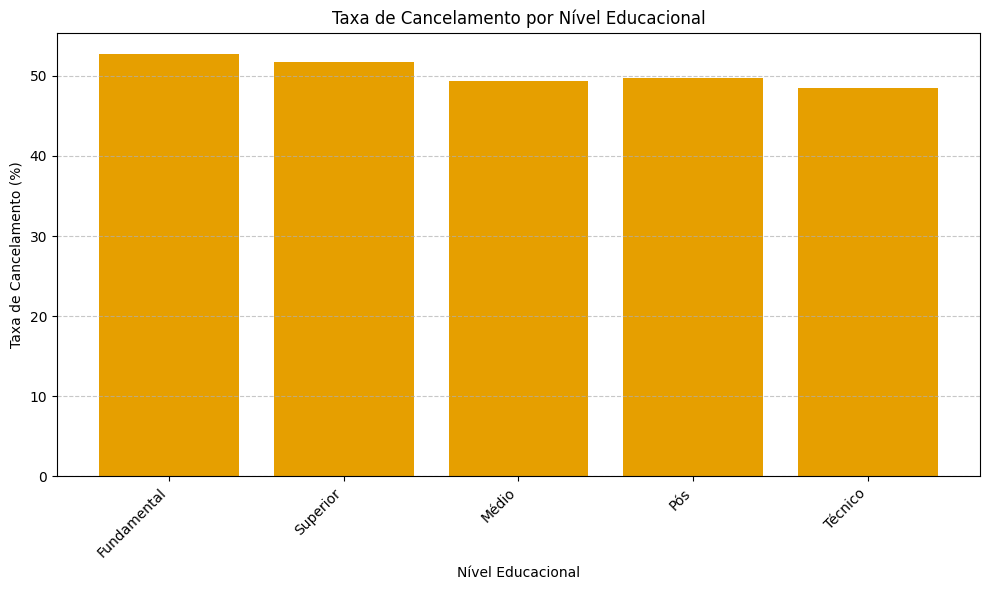

In [103]:
df_nivel_educacional_agroup_cancel['taxa_cancelamento_pct'] = (
    df_nivel_educacional_agroup_cancel['total_cancelamentos'] /
    df_nivel_educacional_agroup_cancel['total_clientes'] * 100
).round(2)

plt.figure(figsize=(10,6))
plt.bar(
    df_nivel_educacional_agroup_cancel['nivel_educacional'],
    df_nivel_educacional_agroup_cancel['taxa_cancelamento_pct'],
    color='#e69f00'
)
plt.xlabel('Nível Educacional')
plt.ylabel('Taxa de Cancelamento (%)')
plt.title('Taxa de Cancelamento por Nível Educacional')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## 2.Perfil Financeiro e Pagamento

2.1 Média de valor do seguro pago por idade.

In [104]:
query_media_seguro_por_idade = """ 
SELECT 
  CASE 
    WHEN idade BETWEEN 18 AND 25 THEN '18-25'
    WHEN idade BETWEEN 26 AND 35 THEN '26-35'
    WHEN idade BETWEEN 36 AND 45 THEN '36-45'
    WHEN idade BETWEEN 46 AND 60 THEN '46-60'
    ELSE '60+'
  END AS faixa_etaria,
  AVG(co.valor_premio_mensal) AS media_valor_mensal
FROM (
  SELECT 
    cl.id_cliente,
    CAST((julianday('now') - julianday(cl.data_nascimento)) / 365.25 AS INT) AS idade
  FROM clientes cl
) AS sub
JOIN contratos co ON sub.id_cliente = co.id_cliente
GROUP BY faixa_etaria
ORDER BY faixa_etaria;

"""

df_media_seguro_por_idade = pd.read_sql_query(query_media_seguro_por_idade, conn)
df_media_seguro_por_idade.round(2)

,faixa_etaria,media_valor_mensal
0,18-25,783.59
1,26-35,793.09
2,36-45,775.09
3,46-60,783.30
4,60+,778.04


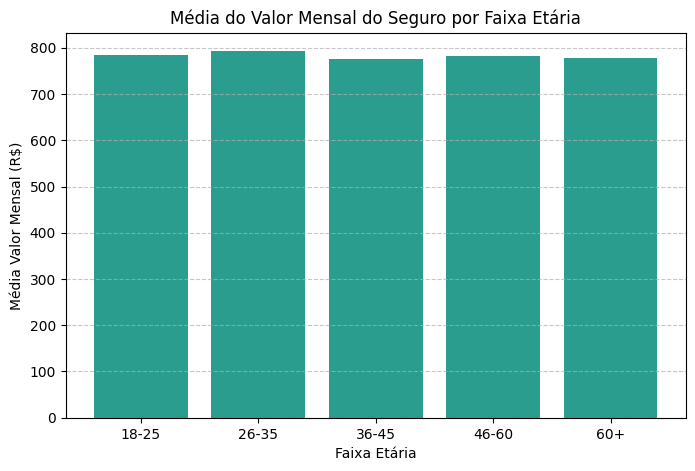

In [117]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(
    df_media_seguro_por_idade['faixa_etaria'],
    df_media_seguro_por_idade['media_valor_mensal'],
    color='#2a9d8f'
)
plt.title('Média do Valor Mensal do Seguro por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Média Valor Mensal (R$)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


2.2 Valor médio paga impacta no cancelamento?

In [118]:
query_valor_cancel_faixa = """
SELECT 
  CASE 
    WHEN idade BETWEEN 18 AND 25 THEN '18-25'
    WHEN idade BETWEEN 26 AND 35 THEN '26-35'
    WHEN idade BETWEEN 36 AND 45 THEN '36-45'
    WHEN idade BETWEEN 46 AND 60 THEN '46-60'
    ELSE '60+'
  END AS faixa_etaria,
  AVG(co.valor_premio_mensal) AS media_valor_mensal,
  COUNT(ca.id_contrato) AS total_cancelamentos
FROM (
  SELECT 
    cl.id_cliente,
    CAST((julianday('now') - julianday(cl.data_nascimento)) / 365.25 AS INT) AS idade
  FROM clientes cl
) AS sub
JOIN contratos co ON sub.id_cliente = co.id_cliente
LEFT JOIN cancelamentos ca ON co.id_contrato = ca.id_contrato
GROUP BY faixa_etaria
ORDER BY faixa_etaria;
"""

df_valor_cancel_faixa = pd.read_sql_query(query_valor_cancel_faixa, conn)
print(df_valor_cancel_faixa)

  faixa_etaria  media_valor_mensal  total_cancelamentos
0        18-25          783.591322                  299
1        26-35          793.092713                  380
2        36-45          775.089033                  417
3        46-60          783.303949                  618
4          60+          778.041729                  806


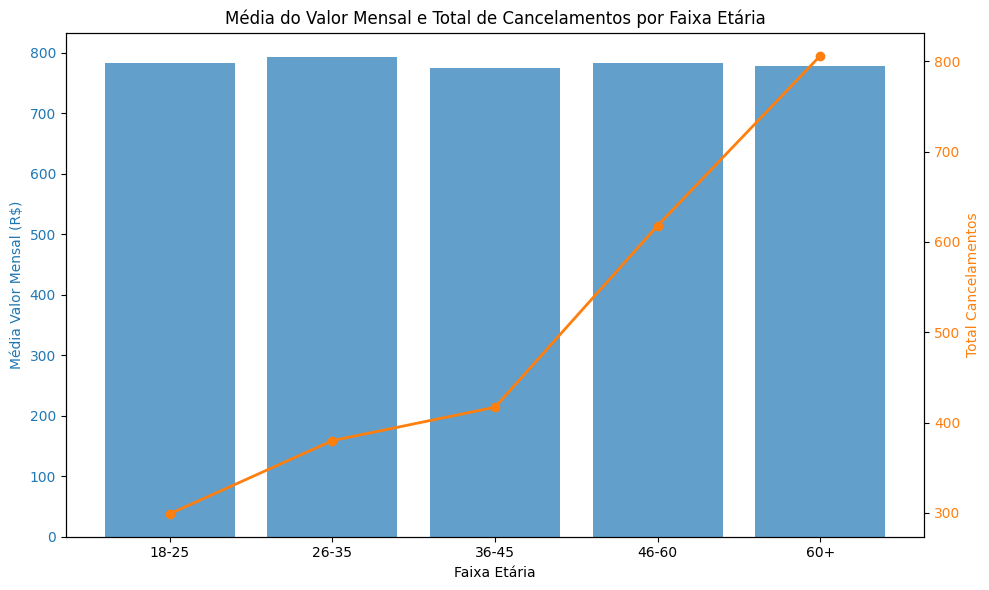

In [119]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10,6))

# Gráfico de barras para média do valor mensal
ax1.bar(
    df_valor_cancel_faixa['faixa_etaria'],
    df_valor_cancel_faixa['media_valor_mensal'],
    color='#1f77b4',
    alpha=0.7,
    label='Média Valor Mensal (R$)'
)
ax1.set_xlabel('Faixa Etária')
ax1.set_ylabel('Média Valor Mensal (R$)', color='#1f77b4')
ax1.tick_params(axis='y', labelcolor='#1f77b4')

# Criar segundo eixo y para cancelamentos
ax2 = ax1.twinx()
ax2.plot(
    df_valor_cancel_faixa['faixa_etaria'],
    df_valor_cancel_faixa['total_cancelamentos'],
    color='#ff7f0e',
    marker='o',
    linewidth=2,
    label='Total Cancelamentos'
)
ax2.set_ylabel('Total Cancelamentos', color='#ff7f0e')
ax2.tick_params(axis='y', labelcolor='#ff7f0e')

# Título e legenda
plt.title('Média do Valor Mensal e Total de Cancelamentos por Faixa Etária')
fig.tight_layout()
plt.show()


2.3 Qual a média de valor do plano por cliente?

Valor médio por tipo de plano

In [107]:
query_valor_por_tipo = """
SELECT 
  tipo_seguro,
  AVG(valor_premio_mensal) AS media_valor_mensal
FROM contratos
GROUP BY tipo_seguro
ORDER BY media_valor_mensal DESC;
"""

df_valor_por_tipo = pd.read_sql_query(query_valor_por_tipo, conn)
print(df_valor_por_tipo)

   tipo_seguro  media_valor_mensal
0  Residencial          791.598784
1  Empresarial          784.393966
2        Saúde          781.450582
3         Vida          778.476463
4         Auto          773.443067


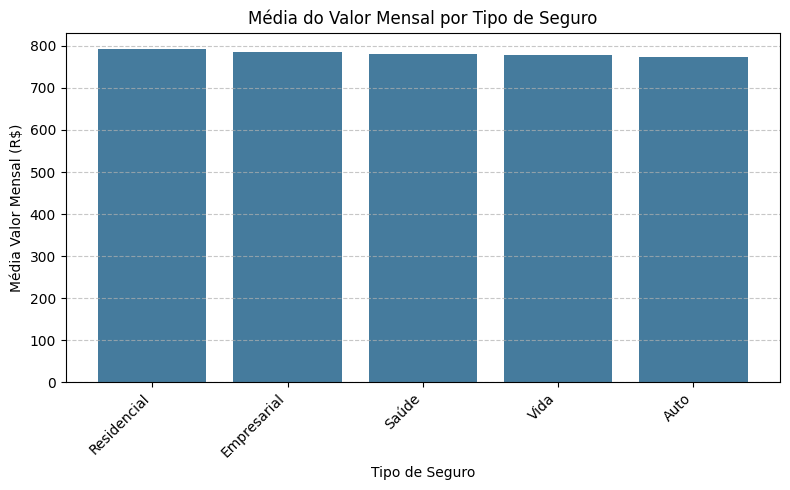

In [120]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(
    df_valor_por_tipo['tipo_seguro'],
    df_valor_por_tipo['media_valor_mensal'],
    color='#457b9d'
)
plt.title('Média do Valor Mensal por Tipo de Seguro')
plt.xlabel('Tipo de Seguro')
plt.ylabel('Média Valor Mensal (R$)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


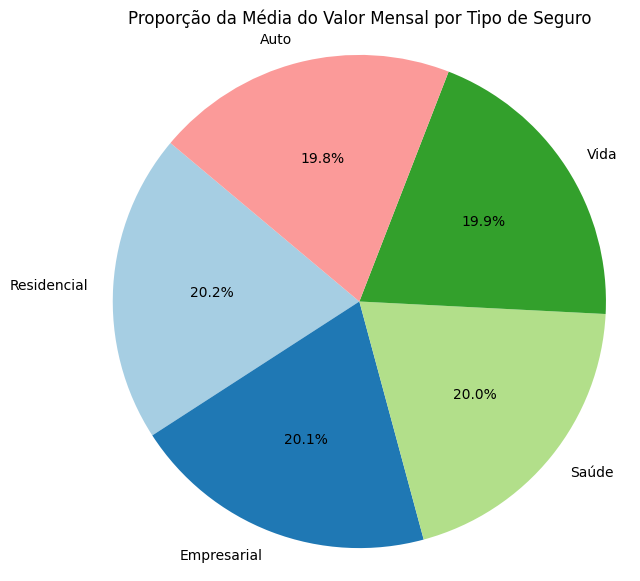

In [121]:
plt.figure(figsize=(7,7))
plt.pie(
    df_valor_por_tipo['media_valor_mensal'],
    labels=df_valor_por_tipo['tipo_seguro'],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title('Proporção da Média do Valor Mensal por Tipo de Seguro')
plt.axis('equal')  # deixa o círculo redondo
plt.show()


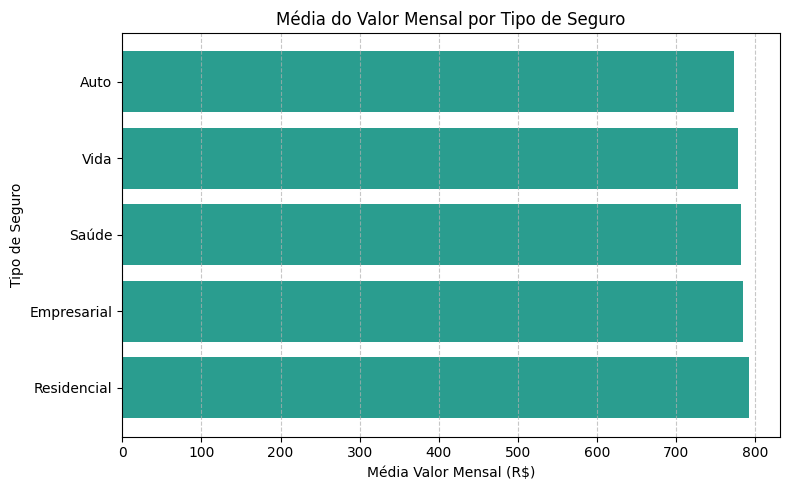

In [122]:
plt.figure(figsize=(8,5))
plt.barh(
    df_valor_por_tipo['tipo_seguro'],
    df_valor_por_tipo['media_valor_mensal'],
    color='#2a9d8f'
)
plt.title('Média do Valor Mensal por Tipo de Seguro')
plt.xlabel('Média Valor Mensal (R$)')
plt.ylabel('Tipo de Seguro')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


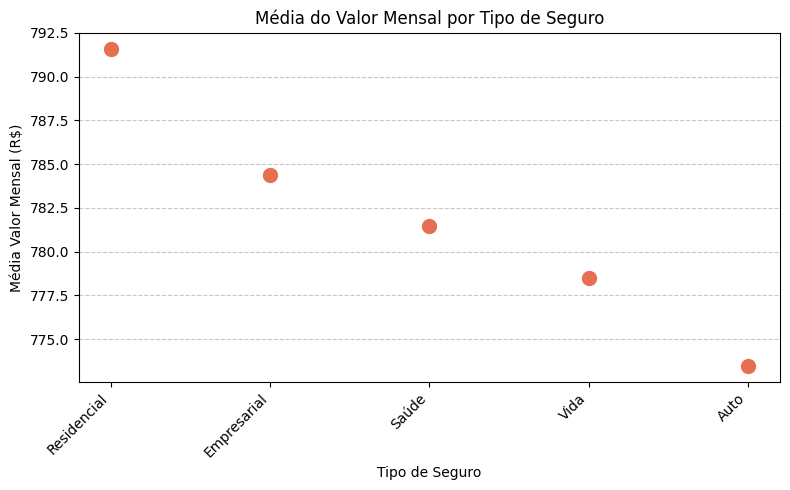

In [123]:
plt.figure(figsize=(8,5))
plt.scatter(
    df_valor_por_tipo['tipo_seguro'],
    df_valor_por_tipo['media_valor_mensal'],
    color='#e76f51',
    s=100
)
plt.title('Média do Valor Mensal por Tipo de Seguro')
plt.xlabel('Tipo de Seguro')
plt.ylabel('Média Valor Mensal (R$)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


2.4 Há histórico de pagamentos por cliente?

In [108]:
query_contratos_por_cliente = """
SELECT 
  cl.id_cliente,
  cl.nome,
  COUNT(co.id_contrato) AS total_contratos
FROM clientes cl
JOIN contratos co ON cl.id_cliente = co.id_cliente
GROUP BY cl.id_cliente, cl.nome
ORDER BY total_contratos DESC;
"""

df_contratos_por_cliente = pd.read_sql_query(query_contratos_por_cliente, conn)
print(df_contratos_por_cliente)

df_mais_de_um = df_contratos_por_cliente[df_contratos_por_cliente['total_contratos'] > 1]
print(f"{len(df_mais_de_um)} clientes possuem mais de 1 contrato.")

     id_cliente                   nome  total_contratos
0        C02589     Alice da Conceição               11
1        C00212           Thomas Pires                9
2        C00922        Bárbara Moreira                9
3        C03146  Luiz Fernando Barbosa                9
4        C03860      Mariane Fernandes                9
...         ...                    ...              ...
4544     C04965         Julia Monteiro                1
4545     C04968           Alícia Ramos                1
4546     C04978        Sr. Caio Araújo                1
4547     C04983     Sra. Maria Rezende                1
4548     C04994    Sr. Davi Cavalcanti                1

[4549 rows x 3 columns]
3464 clientes possuem mais de 1 contrato.


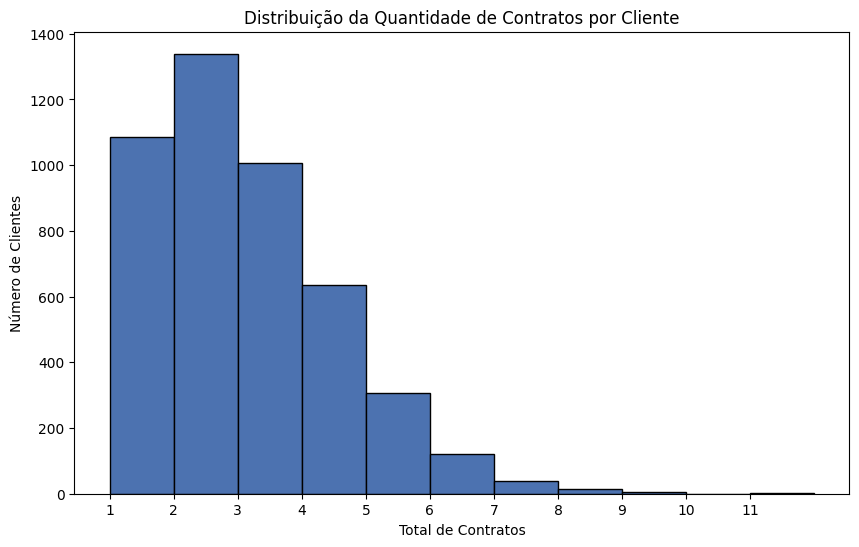

In [127]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(df_contratos_por_cliente['total_contratos'], bins=range(1, df_contratos_por_cliente['total_contratos'].max() + 2), color='#4c72b0', edgecolor='black')
plt.title('Distribuição da Quantidade de Contratos por Cliente')
plt.xlabel('Total de Contratos')
plt.ylabel('Número de Clientes')
plt.xticks(range(1, df_contratos_por_cliente['total_contratos'].max() + 1))
plt.show()

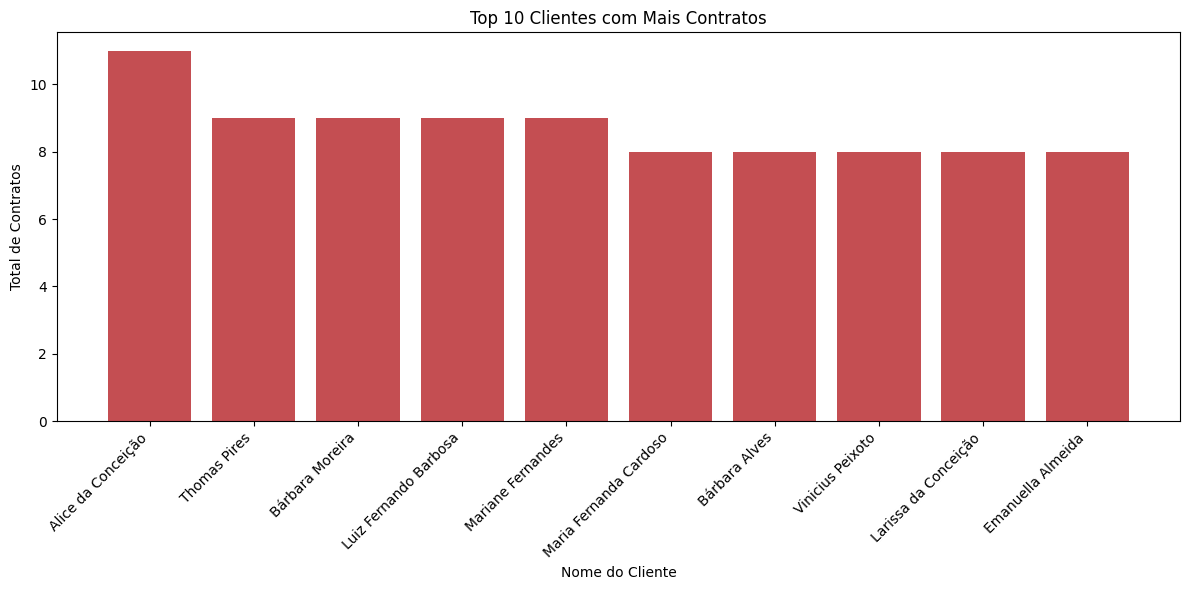

In [128]:
top10 = df_contratos_por_cliente.head(10)

plt.figure(figsize=(12,6))
plt.bar(top10['nome'], top10['total_contratos'], color='#c44e52')
plt.title('Top 10 Clientes com Mais Contratos')
plt.xlabel('Nome do Cliente')
plt.ylabel('Total de Contratos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Quantas pessoas (clientes) têm mais de um contrato e pelo menos um foi cancelado?

In [109]:
query_clientes_multiplos_cancelados = """
SELECT 
  cl.id_cliente,
  cl.nome,
  COUNT(DISTINCT co.id_contrato) AS total_contratos,
  COUNT(DISTINCT ca.id_contrato) AS total_cancelados
FROM clientes cl
JOIN contratos co ON cl.id_cliente = co.id_cliente
LEFT JOIN cancelamentos ca ON co.id_contrato = ca.id_contrato
GROUP BY cl.id_cliente, cl.nome
HAVING total_contratos > 1 AND total_cancelados > 0
ORDER BY total_cancelados DESC;
"""

df_clientes_multiplos_cancelados = pd.read_sql_query(query_clientes_multiplos_cancelados, conn)
print(df_clientes_multiplos_cancelados)
print(f"\nTotal de clientes com >1 contrato e pelo menos 1 cancelado: {len(df_clientes_multiplos_cancelados)}")

     id_cliente                    nome  total_contratos  total_cancelados
0        C00022    Luiz Gustavo Rezende                7                 4
1        C00994    João Guilherme Costa                6                 4
2        C01277        Davi Lucas Lopes                6                 4
3        C01304          Vitor Nogueira                5                 4
4        C02115  Dr. Vitor Hugo Cardoso                7                 4
...         ...                     ...              ...               ...
1749     C04989           Raul Ferreira                4                 1
1750     C04995             Lívia Moura                2                 1
1751     C04996        Ana Júlia Farias                4                 1
1752     C04998      Luiz Otávio Mendes                2                 1
1753     C04999            Agatha Alves                4                 1

[1754 rows x 4 columns]

Total de clientes com >1 contrato e pelo menos 1 cancelado: 1754


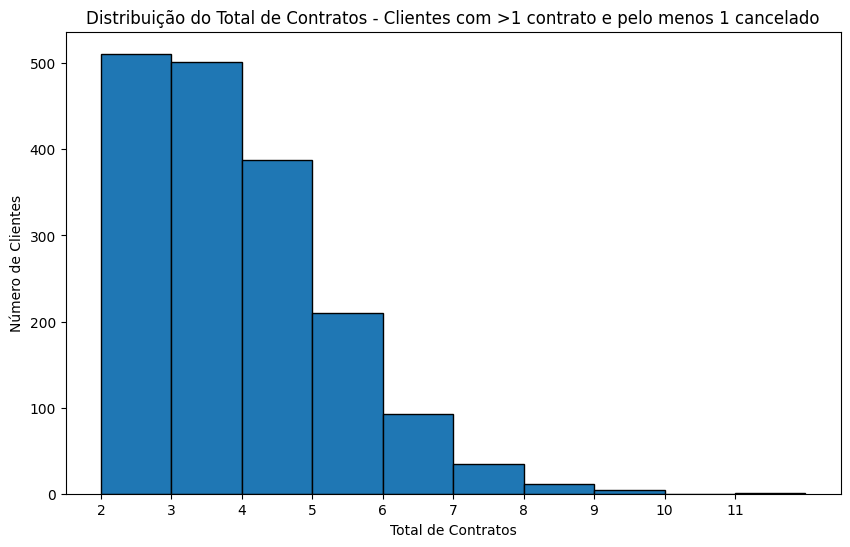

In [129]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(df_clientes_multiplos_cancelados['total_contratos'], bins=range(2, df_clientes_multiplos_cancelados['total_contratos'].max() + 2), color='#1f77b4', edgecolor='black')
plt.title('Distribuição do Total de Contratos - Clientes com >1 contrato e pelo menos 1 cancelado')
plt.xlabel('Total de Contratos')
plt.ylabel('Número de Clientes')
plt.xticks(range(2, df_clientes_multiplos_cancelados['total_contratos'].max() + 1))
plt.show()


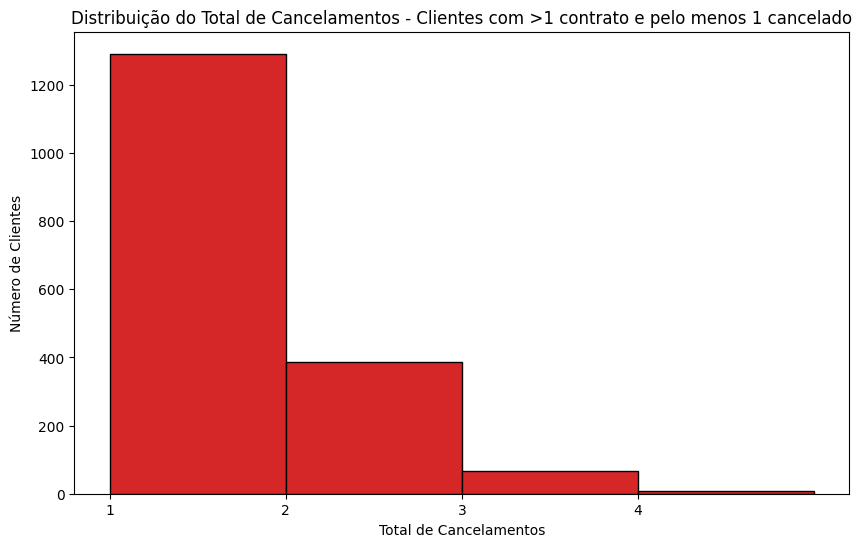

In [130]:
plt.figure(figsize=(10,6))
plt.hist(df_clientes_multiplos_cancelados['total_cancelados'], bins=range(1, df_clientes_multiplos_cancelados['total_cancelados'].max() + 2), color='#d62728', edgecolor='black')
plt.title('Distribuição do Total de Cancelamentos - Clientes com >1 contrato e pelo menos 1 cancelado')
plt.xlabel('Total de Cancelamentos')
plt.ylabel('Número de Clientes')
plt.xticks(range(1, df_clientes_multiplos_cancelados['total_cancelados'].max() + 1))
plt.show()


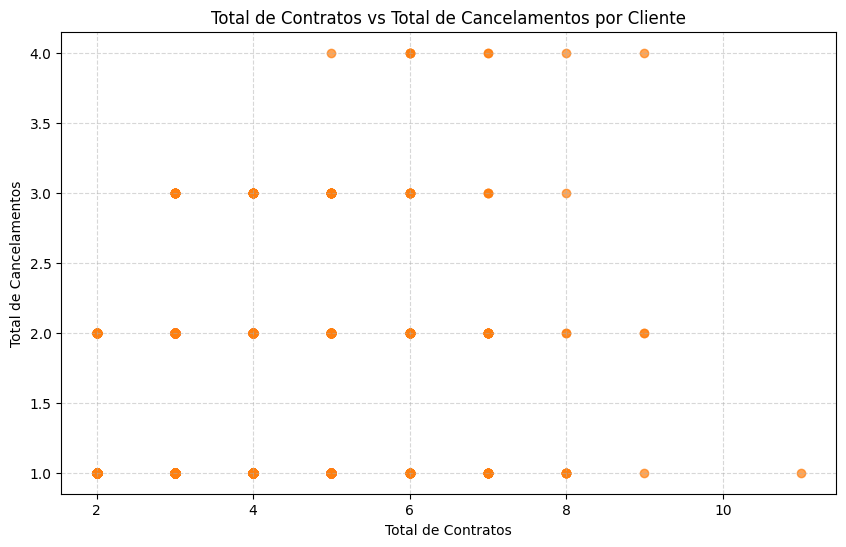

In [131]:
plt.figure(figsize=(10,6))
plt.scatter(
    df_clientes_multiplos_cancelados['total_contratos'],
    df_clientes_multiplos_cancelados['total_cancelados'],
    alpha=0.7,
    color='#ff7f0e'
)
plt.title('Total de Contratos vs Total de Cancelamentos por Cliente')
plt.xlabel('Total de Contratos')
plt.ylabel('Total de Cancelamentos')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


Quantos clientes com apenas um contrato que cancelaram?


In [110]:
query_um_contrato_cancelado = """
SELECT 
  cl.id_cliente,
  cl.nome,
  COUNT(DISTINCT co.id_contrato) AS total_contratos,
  COUNT(DISTINCT ca.id_contrato) AS total_cancelados
FROM clientes cl
JOIN contratos co ON cl.id_cliente = co.id_cliente
LEFT JOIN cancelamentos ca ON co.id_contrato = ca.id_contrato
GROUP BY cl.id_cliente, cl.nome
HAVING total_contratos = 1 AND total_cancelados = 1
ORDER BY cl.nome;
"""

df_um_contrato_cancelado = pd.read_sql_query(query_um_contrato_cancelado, conn)
print(df_um_contrato_cancelado)
print(f"\nTotal de clientes com 1 contrato cancelado: {len(df_um_contrato_cancelado)}")

    id_cliente                 nome  total_contratos  total_cancelados
0       C03082        Agatha Mendes                1                 1
1       C00771       Alana Caldeira                1                 1
2       C02530      Alexandre Alves                1                 1
3       C02598  Alexandre Rodrigues                1                 1
4       C00924       Alice Ferreira                1                 1
..         ...                  ...              ...               ...
214     C01013    Vitor Hugo Moraes                1                 1
215     C02926   Vitor Hugo da Rosa                1                 1
216     C01331      Vitória Cardoso                1                 1
217     C01253         Yago Pereira                1                 1
218     C01583        Yasmin Moraes                1                 1

[219 rows x 4 columns]

Total de clientes com 1 contrato cancelado: 219


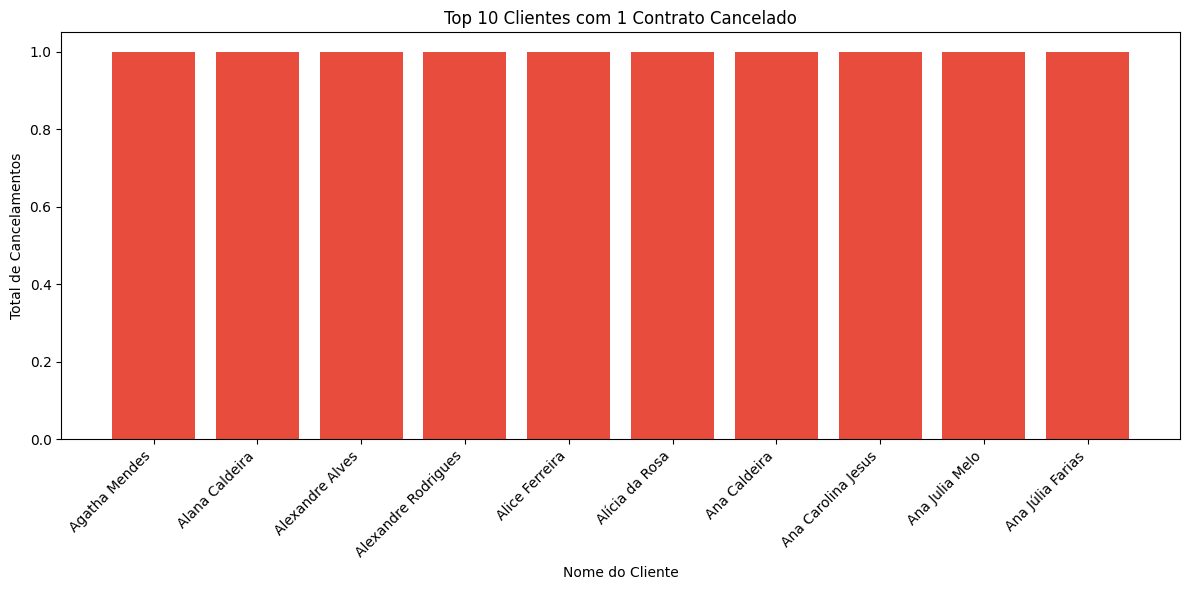

In [132]:
import matplotlib.pyplot as plt

top10_cancelados = df_um_contrato_cancelado.head(10)

plt.figure(figsize=(12,6))
plt.bar(top10_cancelados['nome'], top10_cancelados['total_cancelados'], color='#e74c3c')
plt.title('Top 10 Clientes com 1 Contrato Cancelado')
plt.xlabel('Nome do Cliente')
plt.ylabel('Total de Cancelamentos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


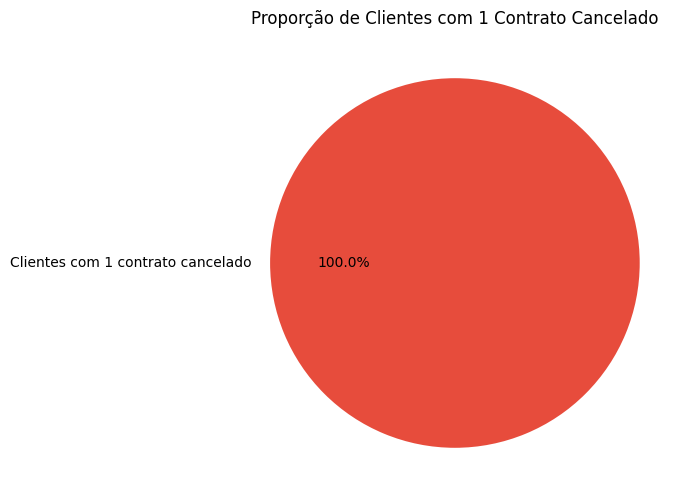

In [133]:
labels = ['Clientes com 1 contrato cancelado']
sizes = [len(df_um_contrato_cancelado)]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#e74c3c'])
plt.title('Proporção de Clientes com 1 Contrato Cancelado')
plt.show()


Clientes que possuem apenas um contrato, como é a modalidade de tempo de contrato deles?

In [111]:
query_duracao_um_contrato = """
SELECT 
  cl.id_cliente,
  cl.nome,
  co.data_inicio,
  co.data_fim,
  julianday(co.data_fim) - julianday(co.data_inicio) AS duracao_dias
FROM clientes cl
JOIN contratos co ON cl.id_cliente = co.id_cliente
LEFT JOIN (
    SELECT id_cliente
    FROM contratos
    GROUP BY id_cliente
    HAVING COUNT(*) > 1
) multi_contratos ON cl.id_cliente = multi_contratos.id_cliente
WHERE multi_contratos.id_cliente IS NULL
"""

df_duracao_um_contrato = pd.read_sql_query(query_duracao_um_contrato, conn)
print(df_duracao_um_contrato.head())

# Estatísticas básicas
print(df_duracao_um_contrato['duracao_dias'].describe())


  id_cliente                nome data_inicio    data_fim  duracao_dias
0     C00002  Matheus Nascimento  2024-09-14  2025-03-13         180.0
1     C00003  Sra. Pietra Farias  2023-10-29  2025-10-28         730.0
2     C00004    Vicente Ferreira  2024-03-05  2025-03-05         365.0
3     C00006       Murilo Moraes  2023-07-23  2025-07-22         730.0
4     C00011       Stella Aragão  2024-05-31  2024-11-27         180.0
count    1085.000000
mean      419.824885
std       227.282431
min       180.000000
25%       180.000000
50%       365.000000
75%       730.000000
max       730.000000
Name: duracao_dias, dtype: float64


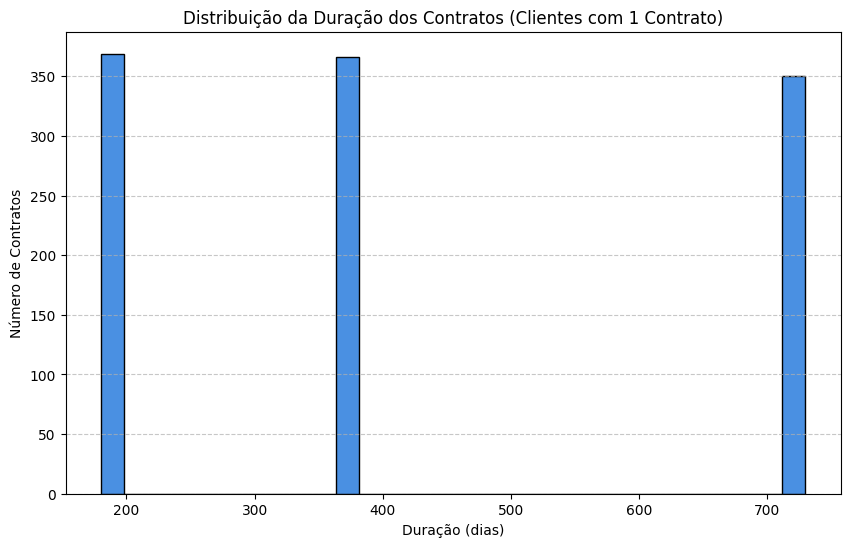

In [134]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(df_duracao_um_contrato['duracao_dias'].dropna(), bins=30, color='#4a90e2', edgecolor='black')
plt.title('Distribuição da Duração dos Contratos (Clientes com 1 Contrato)')
plt.xlabel('Duração (dias)')
plt.ylabel('Número de Contratos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


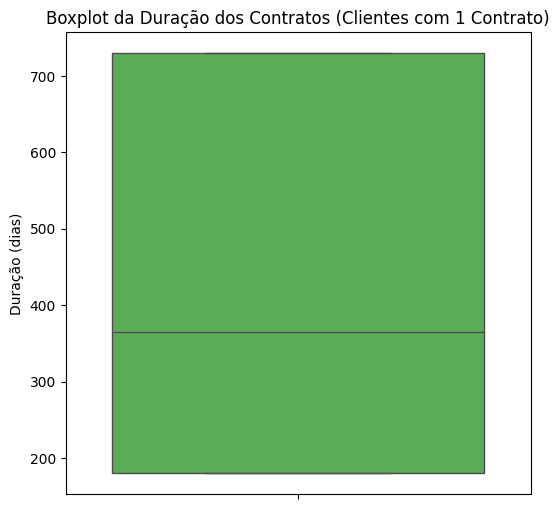

In [135]:
import seaborn as sns

plt.figure(figsize=(6,6))
sns.boxplot(y=df_duracao_um_contrato['duracao_dias'], color='#50b948')
plt.title('Boxplot da Duração dos Contratos (Clientes com 1 Contrato)')
plt.ylabel('Duração (dias)')
plt.show()


2.5 Clientes que pagam anualmente tem menor taxa de cancelamento?

In [112]:
query_taxa_cancel_anual = """
WITH contratos_duracao AS (
  SELECT 
    co.*,
    julianday(co.data_fim) - julianday(co.data_inicio) AS duracao_dias,
    CASE 
      WHEN julianday(co.data_fim) - julianday(co.data_inicio) >= 330 THEN 'Anual'
      ELSE 'Outros'
    END AS tipo_contrato
  FROM contratos co
)

SELECT 
  tipo_contrato,
  co.tipo_seguro,
  COUNT(co.id_contrato) AS total_contratos,
  COUNT(ca.id_contrato) AS total_cancelamentos,
  ROUND( (CAST(COUNT(ca.id_contrato) AS FLOAT) / COUNT(co.id_contrato)) * 100, 2) AS taxa_cancelamento_percentual
FROM contratos_duracao co
LEFT JOIN cancelamentos ca ON co.id_contrato = ca.id_contrato
GROUP BY tipo_contrato, co.tipo_seguro
ORDER BY tipo_contrato, taxa_cancelamento_percentual ASC;
"""

df_taxa_cancel_anual = pd.read_sql_query(query_taxa_cancel_anual, conn)
print(df_taxa_cancel_anual)


  tipo_contrato  tipo_seguro  total_contratos  total_cancelamentos  \
0         Anual         Auto             1655                  296   
1         Anual         Vida             1578                  315   
2         Anual  Residencial             1544                  317   
3         Anual  Empresarial             1608                  346   
4         Anual        Saúde             1609                  354   
5        Outros         Vida              828                  174   
6        Outros  Empresarial              815                  176   
7        Outros        Saúde              781                  174   
8        Outros         Auto              774                  173   
9        Outros  Residencial              808                  195   

   taxa_cancelamento_percentual  
0                         17.89  
1                         19.96  
2                         20.53  
3                         21.52  
4                         22.00  
5                        

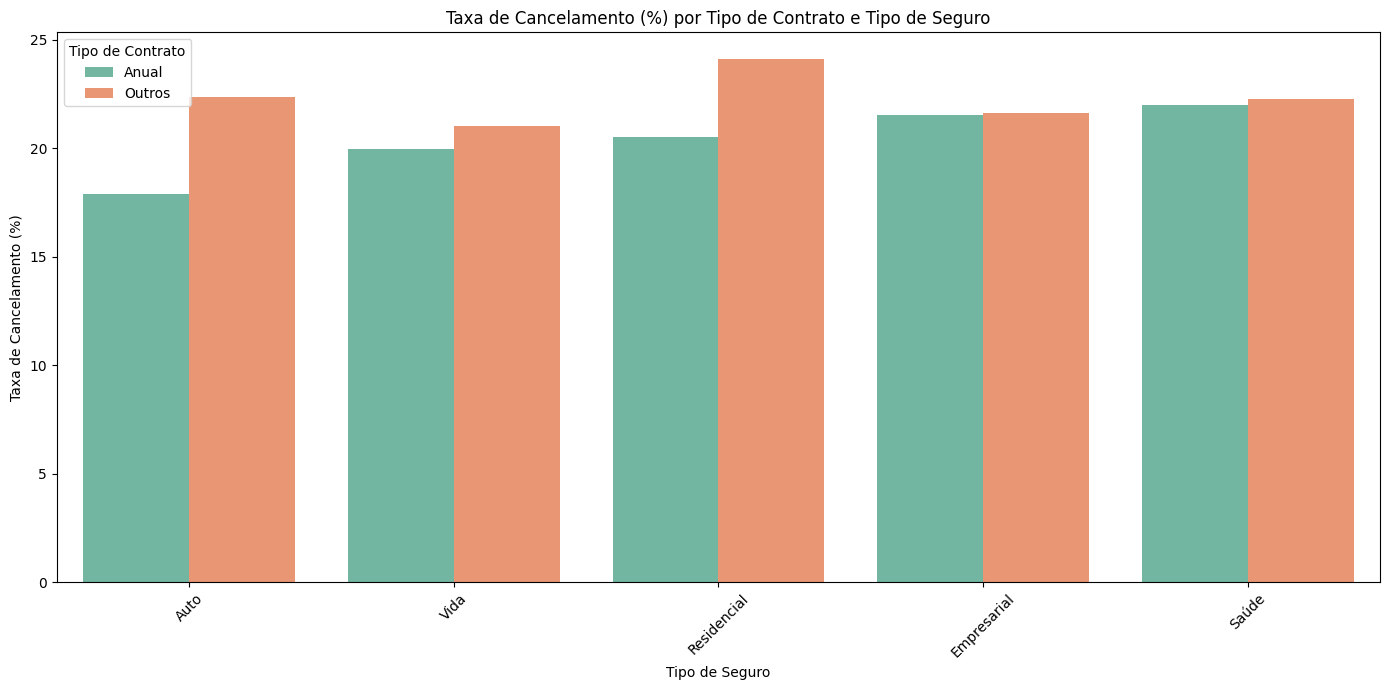

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,7))
sns.barplot(
    data=df_taxa_cancel_anual,
    x='tipo_seguro',
    y='taxa_cancelamento_percentual',
    hue='tipo_contrato',
    palette='Set2'
)
plt.title('Taxa de Cancelamento (%) por Tipo de Contrato e Tipo de Seguro')
plt.xlabel('Tipo de Seguro')
plt.ylabel('Taxa de Cancelamento (%)')
plt.legend(title='Tipo de Contrato')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


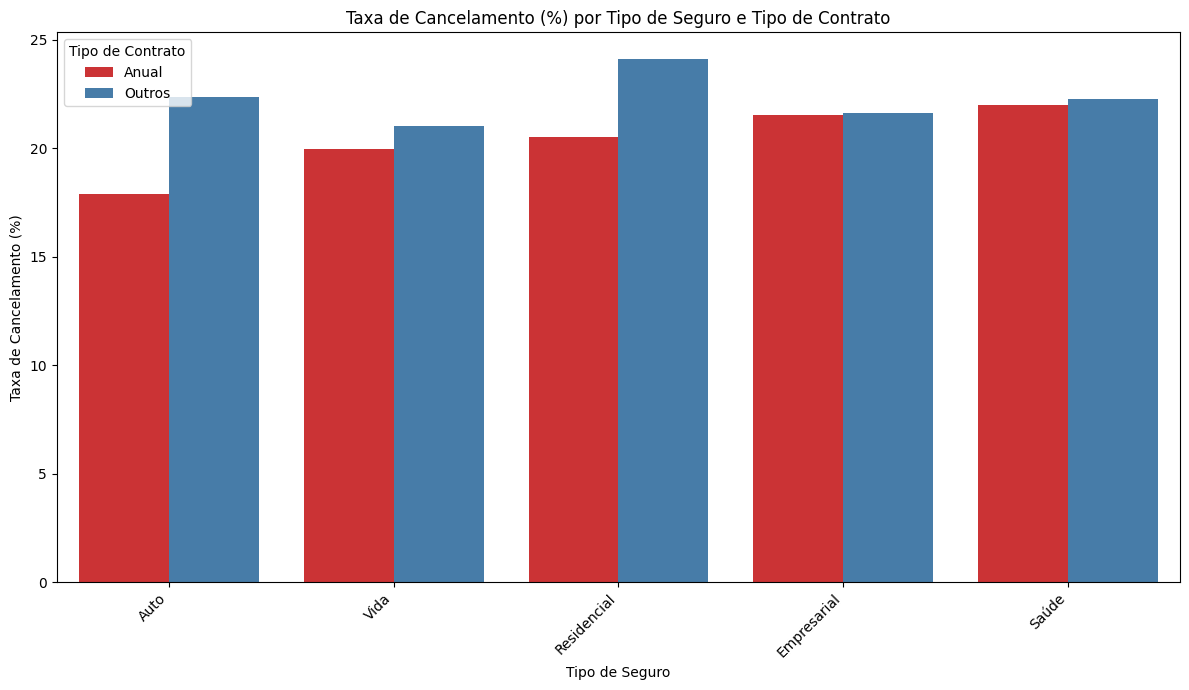

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,7))
sns.barplot(
    data=df_taxa_cancel_anual,
    x='tipo_seguro',
    y='taxa_cancelamento_percentual',
    hue='tipo_contrato',
    palette='Set1'
)
plt.title('Taxa de Cancelamento (%) por Tipo de Seguro e Tipo de Contrato')
plt.xlabel('Tipo de Seguro')
plt.ylabel('Taxa de Cancelamento (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de Contrato')
plt.tight_layout()
plt.show()


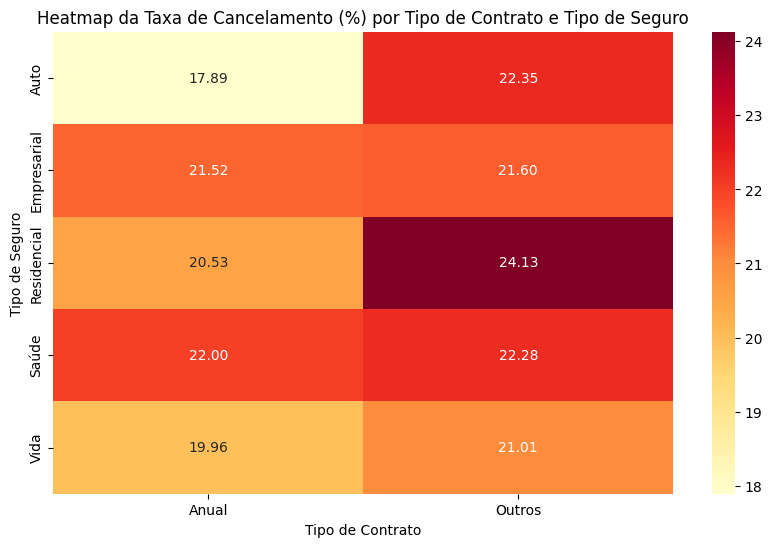

In [137]:
pivot = df_taxa_cancel_anual.pivot(
    index='tipo_seguro',
    columns='tipo_contrato',
    values='taxa_cancelamento_percentual'
).fillna(0)

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt='.2f', cmap='YlOrRd')
plt.title('Heatmap da Taxa de Cancelamento (%) por Tipo de Contrato e Tipo de Seguro')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Tipo de Seguro')
plt.show()


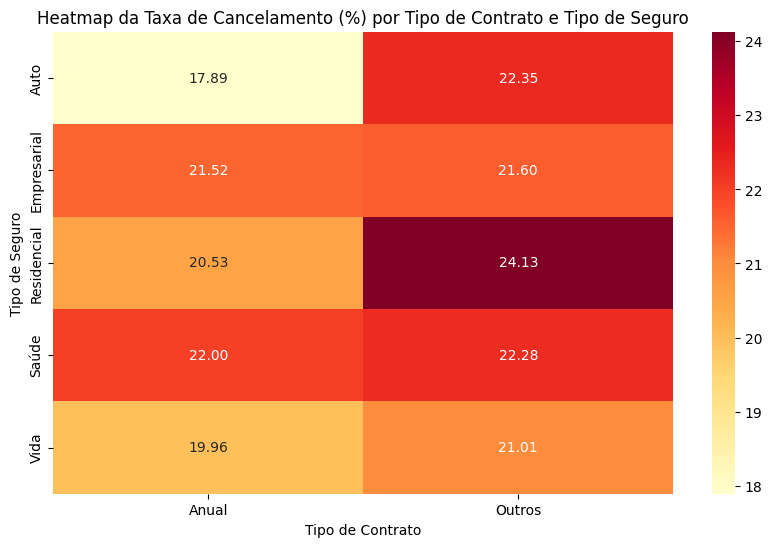

In [138]:
pivot = df_taxa_cancel_anual.pivot(
    index='tipo_seguro',
    columns='tipo_contrato',
    values='taxa_cancelamento_percentual'
).fillna(0)

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt='.2f', cmap='YlOrRd')
plt.title('Heatmap da Taxa de Cancelamento (%) por Tipo de Contrato e Tipo de Seguro')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Tipo de Seguro')
plt.show()


2.6 Clientes que renovam automaticamente são mais fieis ou tendem a cancelar?

In [115]:
query_renovacao_cancelamento = """
SELECT 
  co.renovado_automaticamente,
  COUNT(co.id_contrato) AS total_contratos,
  COUNT(ca.id_contrato) AS total_cancelamentos,
  ROUND( (CAST(COUNT(ca.id_contrato) AS FLOAT) / COUNT(co.id_contrato)) * 100, 2) AS taxa_cancelamento_percentual
FROM contratos co
LEFT JOIN cancelamentos ca ON co.id_contrato = ca.id_contrato
GROUP BY co.renovado_automaticamente;
"""

df_renovacao_cancelamento = pd.read_sql_query(query_renovacao_cancelamento, conn)
print(df_renovacao_cancelamento)

   renovado_automaticamente  total_contratos  total_cancelamentos  \
0                         0             5954                 1254   
1                         1             6046                 1266   

   taxa_cancelamento_percentual  
0                         21.06  
1                         20.94  


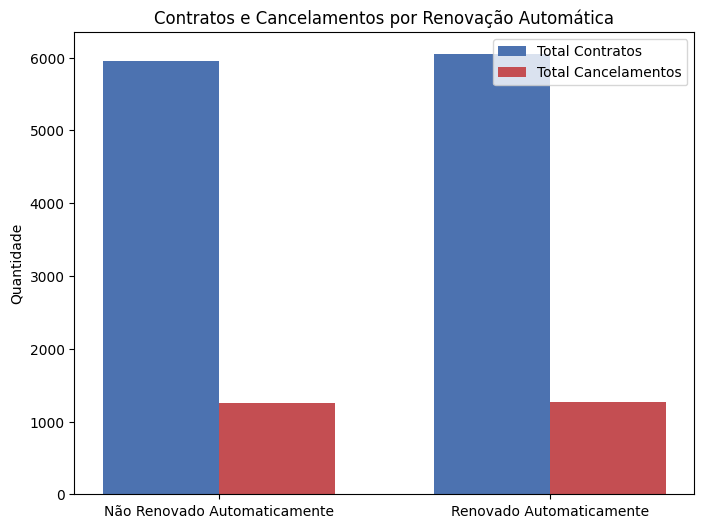

In [139]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['Não Renovado Automaticamente', 'Renovado Automaticamente']
total_contratos = df_renovacao_cancelamento['total_contratos']
total_cancelamentos = df_renovacao_cancelamento['total_cancelamentos']

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(8,6))
plt.bar(x - width/2, total_contratos, width, label='Total Contratos', color='#4c72b0')
plt.bar(x + width/2, total_cancelamentos, width, label='Total Cancelamentos', color='#c44e52')
plt.xticks(x, labels)
plt.ylabel('Quantidade')
plt.title('Contratos e Cancelamentos por Renovação Automática')
plt.legend()
plt.show()


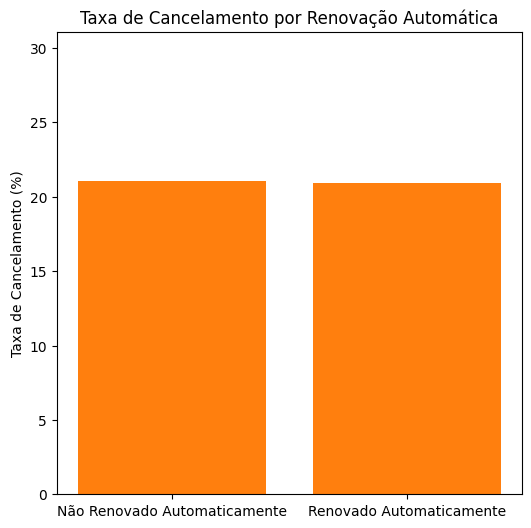

In [140]:
plt.figure(figsize=(6,6))
plt.bar(labels, df_renovacao_cancelamento['taxa_cancelamento_percentual'], color='#ff7f0e')
plt.ylabel('Taxa de Cancelamento (%)')
plt.title('Taxa de Cancelamento por Renovação Automática')
plt.ylim(0, max(df_renovacao_cancelamento['taxa_cancelamento_percentual']) + 10)
plt.show()


2.7 Verificando quantos contratos expirados temos

In [116]:
query_contratos_expirados = """
SELECT *
FROM contratos
WHERE DATE(data_fim) < DATE('now');
"""
df_contratos_expirados = pd.read_sql_query(query_contratos_expirados, conn)
df_contratos_expirados

,id_contrato,id_cliente,tipo_seguro,data_inicio,data_fim,valor_premio_mensal,satisfacao_ultima_avaliacao,canal_venda,renovado_automaticamente
0,63d107e8-f5ee-4df0-807a-4f27b0906442,C04508,Empresarial,2023-02-18,2023-08-17,892.30,Média,Site,0
1,036e784d-6795-473f-8097-962d41257043,C00331,Vida,2024-12-12,2025-06-10,511.69,Baixa,App,0
2,2300ac83-89de-49dc-bead-52c95f761041,C01590,Residencial,2023-09-16,2024-09-15,417.14,Baixa,Corretor,0
3,318fc49f-635d-406d-8e6f-4438ad560b1b,C00378,Vida,2024-09-27,2025-03-26,996.09,Baixa,App,1
4,2d4f5f9d-4ec8-4b95-a979-4435c45d3019,C00840,Residencial,2022-11-11,2024-11-10,721.18,Baixa,App,1
...,...,...,...,...,...,...,...,...,...
7440,aa4e1fd7-2715-473e-9749-535bb6473a49,C00231,Saúde,2023-12-07,2024-06-04,1390.41,Média,Agência Física,0
7441,ec2044b0-35be-4cc1-8318-81c0c4243e44,C00016,Vida,2022-10-23,2024-10-22,599.48,Alta,Agência Física,1
7442,b7617e1b-f563-457d-951a-d8d2ef4a4e90,C00922,Saúde,2023-10-26,2024-04-23,607.17,Alta,App,1
7443,05bb6166-72cc-46cc-9fc4-9082fef6b857,C00312,Residencial,2023-05-31,2023-11-27,334.17,Baixa,Agência Física,0


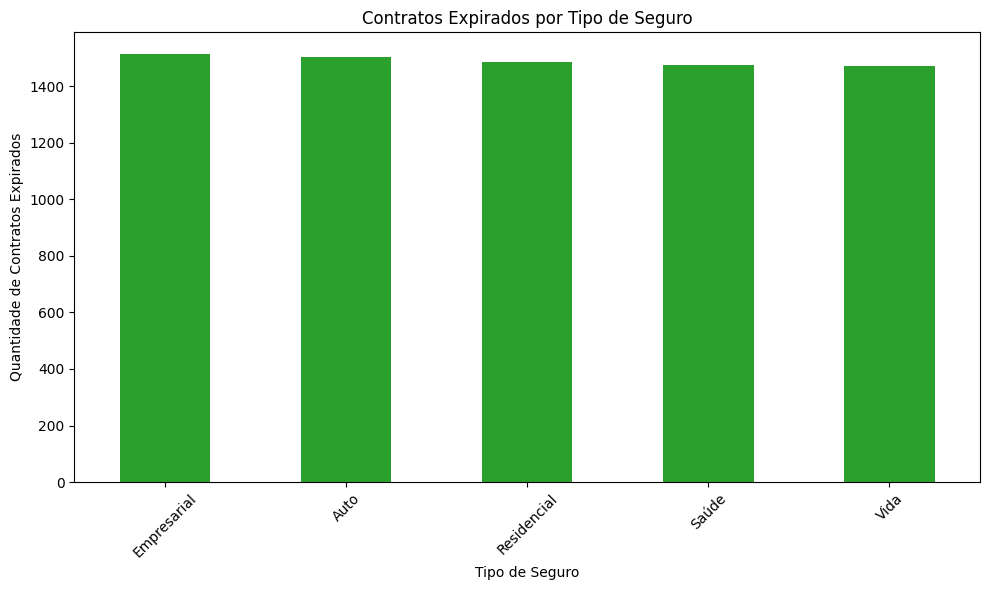

In [141]:
import matplotlib.pyplot as plt

contagem_por_tipo = df_contratos_expirados['tipo_seguro'].value_counts()

plt.figure(figsize=(10,6))
contagem_por_tipo.plot(kind='bar', color='#2ca02c')
plt.title('Contratos Expirados por Tipo de Seguro')
plt.xlabel('Tipo de Seguro')
plt.ylabel('Quantidade de Contratos Expirados')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [124]:
query_renda_por_idade_tipo = """ 
SELECT
  CASE 
    WHEN idade BETWEEN 18 AND 25 THEN '18-25'
    WHEN idade BETWEEN 26 AND 35 THEN '26-35'
    WHEN idade BETWEEN 36 AND 45 THEN '36-45'
    WHEN idade BETWEEN 46 AND 60 THEN '46-60'
    ELSE '60+'
  END AS faixa_etaria,
  co.tipo_seguro,
  AVG(cl.renda_mensal) AS media_renda_mensal
FROM (
  SELECT 
    cl.id_cliente,
    cl.renda_mensal,
    CAST((julianday('now') - julianday(cl.data_nascimento)) / 365.25 AS INT) AS idade
  FROM clientes cl
) AS cl
JOIN contratos co ON cl.id_cliente = co.id_cliente
GROUP BY faixa_etaria, co.tipo_seguro
ORDER BY faixa_etaria, co.tipo_seguro;

"""

df_renda_por_idade_tipo = pd.read_sql_query(query_renda_por_idade_tipo, conn)
df_renda_por_idade_tipo

,faixa_etaria,tipo_seguro,media_renda_mensal
0,18-25,Auto,10256.035185
1,18-25,Empresarial,10776.385635
2,18-25,Residencial,10846.137891
3,18-25,Saúde,10617.936950
4,18-25,Vida,10610.839604
5,26-35,Auto,10888.807500
6,26-35,Empresarial,10860.619284
7,26-35,Residencial,10972.647803
8,26-35,Saúde,10706.656731
9,26-35,Vida,11344.229424


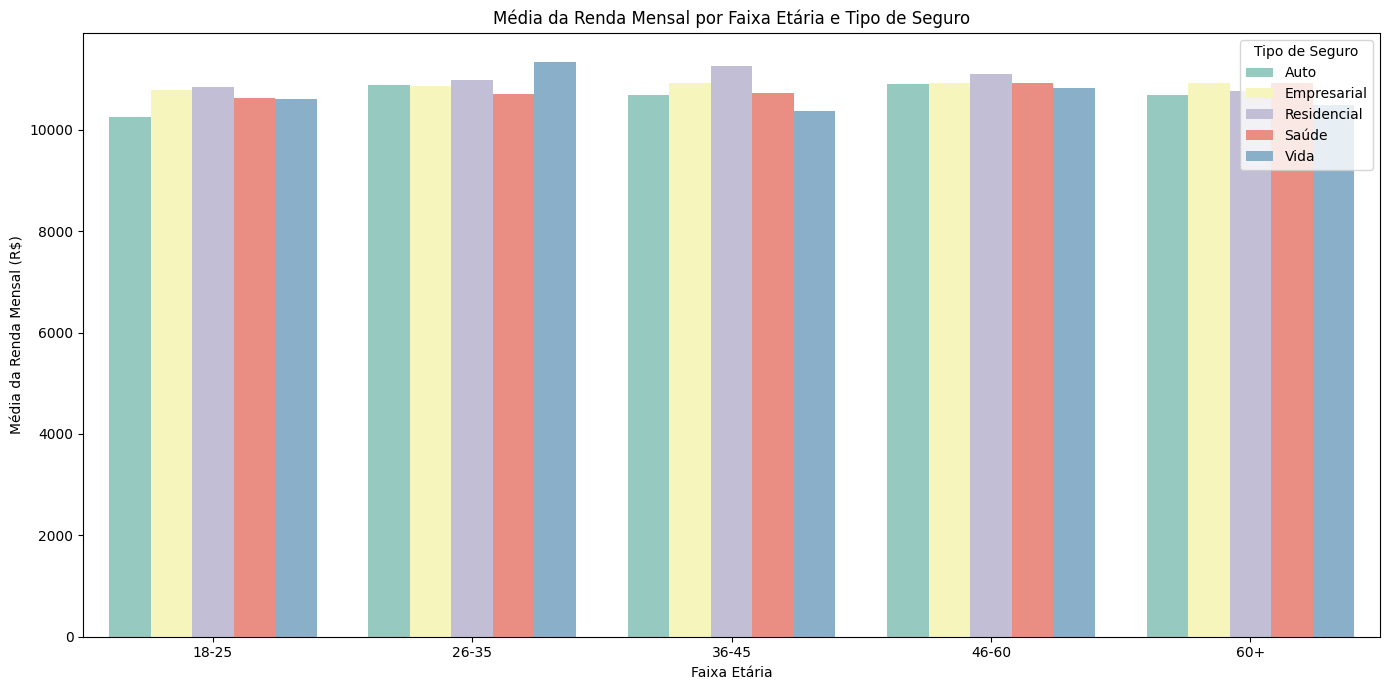

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,7))
sns.barplot(
    data=df_renda_por_idade_tipo,
    x='faixa_etaria',
    y='media_renda_mensal',
    hue='tipo_seguro',
    palette='Set3'
)
plt.title('Média da Renda Mensal por Faixa Etária e Tipo de Seguro')
plt.xlabel('Faixa Etária')
plt.ylabel('Média da Renda Mensal (R$)')
plt.legend(title='Tipo de Seguro')
plt.tight_layout()
plt.show()


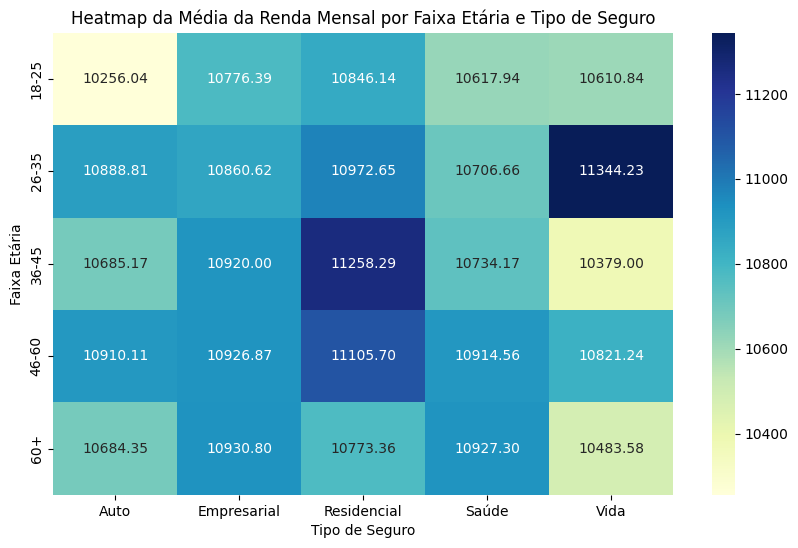

In [126]:
pivot = df_renda_por_idade_tipo.pivot(
    index='faixa_etaria',
    columns='tipo_seguro',
    values='media_renda_mensal'
).fillna(0)

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Heatmap da Média da Renda Mensal por Faixa Etária e Tipo de Seguro')
plt.xlabel('Tipo de Seguro')
plt.ylabel('Faixa Etária')
plt.show()
